Ομάδα 94 - δύο ατόμων: Κριθαρούλα Αναστασία 03117073, Κριθαρούλας Διονύσης 03117875

#Νευρωικά Δίκτυα - Ροή Y - 9ο Εξάμηνο - ΣΗΜΜΥ

# Εργασία 1. Επιβλεπόμενη μάθηση:Ταξινόμηση

In [1]:
!pip install --upgrade scikit-learn 
!pip install --upgrade numpy 
!pip install --upgrade pandas 
!pip install --upgrade imbalanced-learn
!pip install --upgrade seaborn

## Μέρος 1. UCI Dataset

### Εισαγωγή και Επισκόπηση

Στην ακόλουθη εργαστηριακή άσκηση θα εργαστούμε πάνω στο dataset "Japanese Credit Screening" του UCI. Το συγκεκριμένο dataset είναι ένα binary dataset που περιλαμβάνει 690 παραδείγματα (δείγματα) που αντιπροσωπεύουν θετικές και αρνητικές περιπτώσεις ατόμων στα οποία χορηγήθηκε ή δε χορηγήθηκε πίστωση. Τα παραδείγματα αυτά δημιουργήθηκαν μιλώντας με άτομα που εργάζονται σε μια ιαπωνική εταιρία που χορηγεί πιστώσεις και καθώς αφορούν αιτήσεις πιστωτικών καρτών όλα τα ονόματα χαρακτηριστικών και οι αξίες έχουν αντικατασταθεί με σύμβολα για την προστασία των προσωπικών δεδομένων. Κάποια χαρακτηριστικά λοιπόν παίρνουν συνεχείς τιμές (πραγματικοί αριθμοί), ενώ κάποια άλλα είναι κατηγορικά και παίρνουν τιμές από κάποιο μικρό ή και μεγαλύτερο σύνολο συμβολοσειρών. Πιο αναλυτικά, κάθε δείγμα αποτελείται από 16 χαρακτηριστικά Α1, Α2, ..., Α16 με τα ακόλουθα πεδία τιμών:

Attribute | Range 
-------------------|------------------
A1       | a, b 
A2       | continuous 
A3       | continuous
A4       | u, y, l, t
A5       | g, p, gg
A6       | c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff
A7       | v, h, bb, j, n, z, dd, ff, o
A8       | continuous
A9       | t, f
A10      | t, f
A11      | continuous
A12      | t, f
A13      | g, p, s
A14      | continuous
A15      | continuous
A16      | +, -


Παρατηρούμε, λοιπόν, ότι τα χαρακτηριστικά Α2, Α3, Α8, Α11, Α14 και Α15 παίρνουν συνεχείς τιμές, ενώ τα Α1, Α4, Α5, Α6, Α7, Α9, Α10, Α12 και Α13 είναι κατηγορικά μη διατεταγμένα χαρακτηριστικά. Όσον αφορά το χαρακτηριστικό Α16, που παίρνει τιμές '+' ή '-', αντιστοιχεί στις ετικέτες των κλάσεων, με το '+' να δώλωνει δείγματα στα οποία χορηγήθηκε πίστωση, και αντίστοιχα το '-' δείγματα στα οποία δε χορηγήθηκε πίστωση.

Το αρχείο που περιέχει τα δεδομένα καλείται 'crx.data' και αποτελείται από 690 γραμμές κάθε μια από τις οποίες αντιστοιχεί και σε ένα δείγμα του dataset. Καθε γραμμή περιέχει 16 τιμές χωρισμένενες με ',' που αντιστοιχούν στις τιμές των χαρακτηριστικών Α1, Α2, ..., Α16 του εκάστοτε δείγματος. Έτσι, λοιπόν, οι πρώτες 15 κολώνες αντιστοιχούν στα χαρακτηριστικά εισόδου, η 16$^{η}$ κολώνα στα labels των δειγμάτων, ενώ δεν περιέχονται επικεφαλίδες ή αρίθμηση των γραμμών.

Στο συγκεκριμένο dataset παρατηρούμε ότι σε 37 από τα δείγματα (ποσοστό 5%) απουσιάζουν τουλάχιστον μια ή και περισσότερες τιμές χαρακτηριστικών. Οι τιμές που απουσιάζουν σημειώνονται με το χαρακτήρα '?' και εντοπίζονται στα ακόλουθα χαρακτηριστικά, με τη αντίστοιχη συχνότητα:

Attribute | Number of misses
-------------------|------------------
A1       | 12
A2       | 12 
A4       | 6
A5       | 6
A6       | 9
A7       | 9
A14       | 13

Τέλος, όσον αφορά την κατανομή των δειγμάτων στις δύο κλάσεις του dataset, παρατηρούμε ότι αυτή είναι ισορροπημένη, με 307 δείγματα (ποσοστό 44.5%) να αντιστοιχούν σε αιτήσεις στις οποίες χορηγήθηκε πίστωση και 383 δείγματα (ποσοστό 55.5%) να αντιστοιχούν σε αιτήσεις στις οποίες δε χορηγήθηκε πίστωση. 

### Προετοιμασία

Αρχικά, διαβάζουμε το αρχείο 'crx.data' και αποθηκεύουμε τις πρώτες 15 κολώνες (που αντιστοιχούν στα χαρακτηριστικά εισόδου) σε ένα datarame "features_df", και τη 16$^{η}$ κολώνα (που αντιστοιχεί στα labels) σε ένα dataframe "labels_df".

<i><u>Σχόλιο</u>: Για  το διαχωρισμό και την αποθήκευση των attributes χρησιμοποιούμε dataframes και όχι απευθείας numpy arrays λόγω της ποικιλομορφίας των τύπων τους</i>. 

In [ ]:
!cat crx.data

In [20]:
import pandas as pd
import numpy as np

df = pd.read_csv("crx.data", header = None)
df.head()

labels_df = df.iloc[:, [15]] 
features_df = df.iloc[:, :-1]

#### Επεξεργασία του dataframe "labels_df"

Όσον αφορά το dataframe - κολώνα με τις κλάσεις, "labels_df", θα πρέπει να μετατρέψουμε τα string '-' και '+' σε 0 και 1 αντίστοιχα. Για το σκοπό αυτό ορίζουμε το αντίστοιχο mapping, το οποίο και εφαρμόζουμε στο 'labels_df' μέσω της μεθόδου replace. Στη συνέχεια, εφαρμόζουμε διαδοχικά τις μεθόδους "values" και flatten() στο dataframe που προέκυψε, έτσι ώστε να πάρουμε ένα μονοδιάστατο np array (690,).

In [21]:
mapping_labels = {'-': 0, '+': 1}
labels_df = labels_df.replace({15: mapping_labels}) #labels are located in column 15.
np_labels = labels_df.values.flatten()

print('Labels array dimension:', np_labels.shape)

Labels array dimension: (690,)


#### Επεξεργασία του dataframe "features_df"

##### <u>Διαχείριση των απουσιάζουσων τιμών</u>

Οι τιμές που απουσιάζουν στο δοθέν dataset σημειώνονται με το χαρακτήρα '?'. Για τη διαχείριση τους θα χρησιμοποιήσουμε το μετασχηματιστή "Imputer" του scikit-learn. Αρχικά, για δική μας διευκόλυνση αντικαθιστούμε το χαρακτήρα '?' με τη συμβολοσειρά 'nan' στα κατηγορικά χαρακτηριστικά και με numpy.NaN στα χαρακτηριστικά με συνεχείς τιμές. Στη συνέχεια στα κατηγορικά χαρακτηριστικά εφαρμόζουμε έναν SimpleImputer που αντικαθιστά κάθε απουσιάζουσα τιμή με την πιο συχνή τιμή (<i>strategy = most_frequent</i>), ενώ στα χαρακτηριστικά που λαμβάνουν συνεχείς τιμές έναν SimpleImputer που αντικαθιστά κάθε απουσιάζουσα τιμή με τη μέση τιμή (<i>strategy = mean</i>), με τον υπολογισμό τόσο της πιο συχνής τιμής όσο και της μέσης τιμής να βασίζεται αποκλειστικά και μόνο στα train δεδομένα. (Η παραπάνω διαδικασία υλοποιείται μέσω της συνάρτησης Imputation). Για το σκοπό αυτό στο σημείο αυτό χωρίζουμε το δοθέν dataset σε train και test set με ποσοστό 70% και 30% αντίστοιχα, έτσι ώστε να υλοποιήσουμε την προεπεξεργασία των δεδομένων βασισμένοι μόνο στο train set. 

In [22]:
#replace '?' with 'nan' in nominal attributes
features_df = features_df.replace({ x : {'?' : 'nan'} for x in [0, 3, 4, 5, 6]})
#replace '?' with numpy.NaN in continuous attributes
features_df = features_df.replace({ x : {'?' : np.NaN} for x in [1, 13]})

In [23]:
from sklearn.model_selection import train_test_split

#split dataset to train and test set
train_features_df, test_features_df, y_train, y_test = train_test_split(features_df, np_labels, test_size = 0.3)

In [24]:
def Imputation(train_df, test_df, nominal_imputer, continuous_imputer):

  #fit nominal imputer on train data
  df = pd.DataFrame(nominal_imputer.fit_transform(train_df[[0, 3, 4, 5, 6, 8, 9, 11, 12]]))
  df.columns = train_df[[0, 3, 4, 5, 6, 8, 9, 11, 12]].columns
  df.index = train_df[[0, 3, 4, 5, 6, 8, 9, 11, 12]].index  
  train_df[[0, 3, 4, 5, 6, 8, 9, 11, 12]] = df.copy()

  #transform test data with fitted nominal imputer
  df = pd.DataFrame(nominal_imputer.transform(test_df[[0, 3, 4, 5, 6, 8, 9, 11, 12]]))
  df.columns = test_df[[0, 3, 4, 5, 6, 8, 9, 11, 12]].columns
  df.index = test_df[[0, 3, 4, 5, 6, 8, 9, 11, 12]].index  
  test_df[[0, 3, 4, 5, 6, 8, 9, 11, 12]] = df.copy()  

  #fit continuous imputer on train data
  df = pd.DataFrame(continuous_imputer.fit_transform(train_df[[1, 2, 7, 10, 13, 14]]))
  df.columns = train_df[[1, 2, 7, 10, 13, 14]].columns
  df.index = train_df[[1, 2, 7, 10, 13, 14]].index  
  train_df[[1, 2, 7, 10, 13, 14]] = df.copy()

  #transform test data with fitted nominal imputer
  df = pd.DataFrame(continuous_imputer.transform(test_df[[1, 2, 7, 10, 13, 14]]))
  df.columns = test_df[[1, 2, 7, 10, 13, 14]].columns
  df.index = test_df[[1, 2, 7, 10, 13, 14]].index  
  test_df[[1, 2, 7, 10, 13, 14]] = df.copy()  

  return train_df, test_df

In [25]:
from sklearn.impute import SimpleImputer

#define imputer for nominal attributes
imp_nominal = SimpleImputer(missing_values = 'nan', strategy = 'most_frequent')

#define imputer for continuous attributes
imp_continuous = SimpleImputer(missing_values = np.NaN, strategy = 'mean')

In [26]:
train_features_df, test_features_df = Imputation(train_features_df, test_features_df, imp_nominal, imp_continuous) 

#####<u>Διαχείριση των κατηγορικών χαρακτηριστικών</u>

Όσον αφορά τη διαχείριση των κατηγορικών χαρακτηριστικών που βρίσκονται στις κολώνες 0, 3, 5, 6, 8, 9, 11, και 12, καθώς τα σύνολα τιμών αυτών δεν είναι διατεταγμένα, επιλέγουμε να μετατρέψουμε κάθε κατηγορικό χαρτακτηριστικό με m τιμές σε m binary χαρακτηριστικά, από τα οποία ένα μόνο θα είναι ενεργό κάθε φορά. (Η διαδικασία αυτή υλοποιείται στη συνάρτηση Dummies). Σημειώνουμε, βέβαια ότι με τον τρόπο αυτό αυξάνουμε τη διάσταση των χαρακτηριστικών των δειγμάτων μας.

In [27]:
def Dummies(train_df, test_df, column_list = [0, 3, 4, 5, 6, 8, 9, 11, 12]):
  train_df = pd.get_dummies(train_df, columns = column_list)  #convert nominal attribute with m values to m binary attributes - only one of them is active at a time
  test_df = pd.get_dummies(test_df, columns = column_list)
  test_df = test_df.reindex(columns = train_df.columns, fill_value = 0)
  return train_df, test_df 

In [28]:
train_features_df, test_features_df = Dummies(train_features_df, test_features_df)

In [29]:
print('Number of attributes after Dummies:', train_features_df.shape[1])

Number of attributes after Dummies: 46


##### <u>Μετατροπή των χαρακτηριστικών σε numpy arrays</u>

Έπειτα, από την παραπάνω προεπεξεργασία, παρατηρούμε ότι κάθε δείγμα αποτελείται από 46 χαρακτηριστικά. Μετατρέπουμε, λοιπόν, όλες τις τιμές των χαρακτηριστικών όλων των δειγμάτων (train και test set) σε αριθμητικές. Τέλος, μετατρέπουμε τα dataframes που αντιστοιχούν στο train και το test set στην τελική τους μορφή, δηλαδή σε numpy arrays, με σκοπό να πορέσουμε στη συνέχεια να τα χρησιμοποιήσουμε ως εισόδους στους διάφορους ταξινομητές που θα υλοποιήσουμε.

In [30]:
X_train = train_features_df.apply(pd.to_numeric).values # convert to numerical values (pd.to_numeric) and after to numpy array (.values)
X_test = test_features_df.apply(pd.to_numeric).values

In [31]:
print('Shape of train set:', X_train.shape)
print('Shape of test set:', X_test.shape)

Shape of train set: (483, 46)
Shape of test set: (207, 46)


### Ταξινόμηση

Στη συνέχεια πάνω στο δοθέν dataset θα μελετήσουμε καθέναν από τους ακόλουθους ταξινομητές:
- dummy
- Gaussian Naive Bayes(GNB)
- KNeirestNeighbors(kNN)
- Logistic Regression(LR)

#### Επίδοση out-of-the-box

In [14]:
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


dc_uniform = DummyClassifier(strategy = "uniform")
dc_constant_0 = DummyClassifier(strategy = "constant", constant = 0)
dc_constant_1 = DummyClassifier(strategy = "constant", constant = 1)
dc_most_frequent = DummyClassifier(strategy = "most_frequent")
dc_stratified = DummyClassifier(strategy = "stratified")

gnb = GaussianNB()
knn = KNeighborsClassifier()
logisitcRegr = LogisticRegression()

classifiers_out_of_the_box = [dc_uniform, dc_constant_0, dc_constant_1, dc_most_frequent, dc_stratified, gnb, knn, logisitcRegr]
classifiers_names = ['dummy classifier - uniform', 'dummy classifier - constant 0', 'dummy classifier - constant 1', 'dummy classifier - most frequent', 'dummy classifer - stratified',
                     'gaussian naive bayes', 'knn', 'logistic regression']

In [ ]:
japanese_credit_screening_cross_val_accuracy_out_of_the_box = dict()
japanese_credit_screening_cross_val_f1_score_out_of_the_box = dict()
japanese_credit_screening_accuracy_out_of_the_box = dict()
japanese_credit_screening_f1_score_out_of_the_box = dict()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

for classifier, classifier_name in zip(classifiers_out_of_the_box, classifiers_names):
  japanese_credit_screening_cross_val_accuracy_out_of_the_box[classifier_name] = np.round(np.average(cross_val_score(classifier, X_train, y_train, cv = 10, scoring = 'accuracy')), 4)
  japanese_credit_screening_cross_val_f1_score_out_of_the_box[classifier_name] = np.round(np.average(cross_val_score(classifier, X_train, y_train, cv = 10, scoring = 'f1')), 4)
  model = classifier.fit(X_train, y_train)  
  japanese_credit_screening_accuracy_out_of_the_box[classifier_name] = np.round(model.score(X_test, y_test), 4)  
  japanese_credit_screening_f1_score_out_of_the_box[classifier_name] = np.round(f1_score(y_test, model.predict(X_test)), 4)

In [ ]:
sorted_cross_val_accuracy = [(k, japanese_credit_screening_cross_val_accuracy_out_of_the_box[k]) for k in sorted(japanese_credit_screening_cross_val_accuracy_out_of_the_box, key = japanese_credit_screening_cross_val_accuracy_out_of_the_box.get, reverse = True)]

print("Cross Valiidation Accuracy on the Japanese Credit Screening Dataset\n")
for k, v in sorted_cross_val_accuracy:
  print(k + ':', v)

sorted_cross_val_f1_score = [(k, japanese_credit_screening_cross_val_f1_score_out_of_the_box[k]) for k in sorted(japanese_credit_screening_cross_val_f1_score_out_of_the_box, key = japanese_credit_screening_cross_val_f1_score_out_of_the_box.get, reverse = True)]

print("\nCross Valiidation F1 score on the Japanese Credit Screening Dataset\n")
for k, v in sorted_cross_val_f1_score:
  print(k + ':', v)

Cross Valiidation Accuracy on the Japanese Credit Screening Dataset

logistic regression: 0.8446
gaussian naive bayes: 0.8216
knn: 0.6997
dummy classifier - constant 0: 0.5631
dummy classifier - most frequent: 0.5631
dummy classifier - uniform: 0.5174
dummy classifer - stratified: 0.4785
dummy classifier - constant 1: 0.4369

Cross Valiidation F1 score on the Japanese Credit Screening Dataset

logistic regression: 0.8262
gaussian naive bayes: 0.7856
knn: 0.6261
dummy classifier - constant 1: 0.6081
dummy classifier - uniform: 0.4937
dummy classifer - stratified: 0.4027
dummy classifier - constant 0: 0.0
dummy classifier - most frequent: 0.0


In [ ]:
sorted_accuracy = [(k, japanese_credit_screening_accuracy_out_of_the_box[k]) for k in sorted(japanese_credit_screening_accuracy_out_of_the_box, key = japanese_credit_screening_accuracy_out_of_the_box.get, reverse = True)]

print("\nClassification Accuracy on the Japanese Credit Screening Dataset (30% test set)\n")
for k, v in sorted_accuracy:
  print(k + ':', v)

sorted_f1_score = [(k, japanese_credit_screening_f1_score_out_of_the_box[k]) for k in sorted(japanese_credit_screening_f1_score_out_of_the_box, key = japanese_credit_screening_f1_score_out_of_the_box.get, reverse = True)]

print("\nClassification F1 score on the Japanese Credit Screening Dataset (30% test set)\n")
for k, v in sorted_f1_score:
  print(k + ':', v)


Classification Accuracy on the Japanese Credit Screening Dataset (30% test set)

logistic regression: 0.8841
gaussian naive bayes: 0.8647
knn: 0.6522
dummy classifier - uniform: 0.5411
dummy classifier - constant 0: 0.5362
dummy classifier - most frequent: 0.5362
dummy classifer - stratified: 0.5362
dummy classifier - constant 1: 0.4638

Classification F1 score on the Japanese Credit Screening Dataset (30% test set)

logistic regression: 0.875
gaussian naive bayes: 0.8444
dummy classifier - constant 1: 0.6337
knn: 0.5385
dummy classifier - uniform: 0.4639
dummy classifer - stratified: 0.4309
dummy classifier - constant 0: 0.0
dummy classifier - most frequent: 0.0


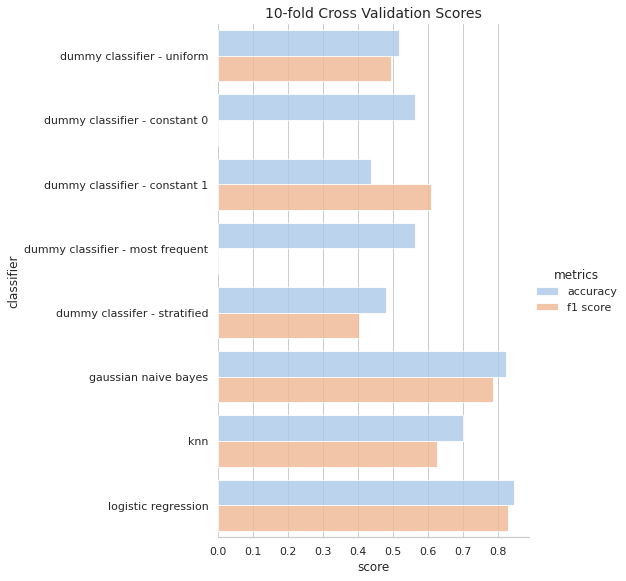

In [ ]:
cross_val_scores_df = pd.DataFrame([[x, 'accuracy', japanese_credit_screening_cross_val_accuracy_out_of_the_box[x]] for x in japanese_credit_screening_cross_val_accuracy_out_of_the_box] +
                  [[x, 'f1 score', japanese_credit_screening_cross_val_f1_score_out_of_the_box[x]] for x in japanese_credit_screening_cross_val_f1_score_out_of_the_box], 
                  columns = ['classifier', 'metric', 'score']) 

import seaborn as sns

sns.set_theme(style="whitegrid")
g = sns.catplot(
    data = cross_val_scores_df, kind = "bar",
    x = "score", y = "classifier", hue = "metric",
    palette = "pastel", alpha = .8, height = 8
)
g.despine(left=True)
g.ax.set_title("10-fold Cross Validation Scores", fontsize = 14)
g.set_axis_labels("score", "classifier")
g.legend.set_title("metrics")

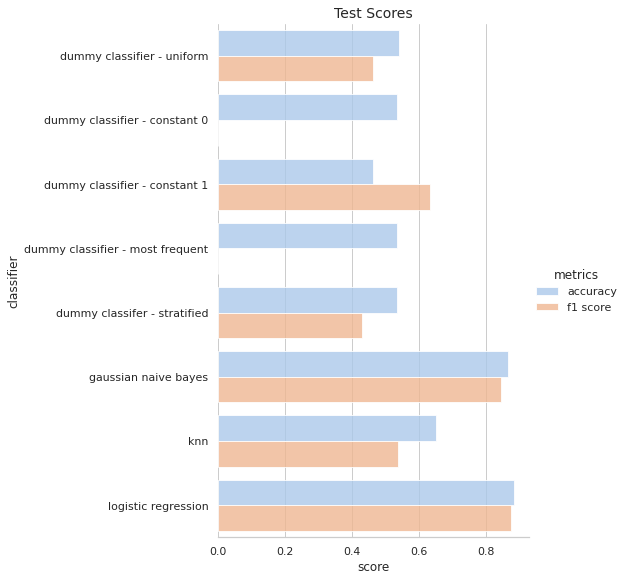

In [ ]:
test_scores_df = pd.DataFrame([[x, 'accuracy', japanese_credit_screening_accuracy_out_of_the_box[x]] for x in japanese_credit_screening_accuracy_out_of_the_box] +
                  [[x, 'f1 score', japanese_credit_screening_f1_score_out_of_the_box[x]] for x in japanese_credit_screening_f1_score_out_of_the_box], 
                  columns = ['classifier', 'metric', 'score']) 

sns.set_theme(style="whitegrid")
g = sns.catplot(
    data = test_scores_df, kind = "bar",
    x = "score", y = "classifier", hue = "metric",
    palette = "pastel", alpha = .8, height = 8
)
g.despine(left = True)
g.ax.set_title("Test Scores", fontsize = 14)
g.set_axis_labels("score", "classifier")
g.legend.set_title("metrics")

#### Βελτιστοποίηση

Θα προσπαθήσουμε στη συνέχεια να βελτιώσουμε τα ποσοστά accuracy και f1 score που επιτυγχάνουν κατά τη διαδικασία του 10-fold cross validation καθένας από τους παραπάνω ταξινομητές Guassian Naive Bayes, k-Neirest Neighbors και Linear Regression. Για το σκοπό αυτό θα χρησιμοποιήσουμε κάποιες επιπλέον τεχνικές pre-processing στα δεδομένα μας, προσπαθώντας παράλληλλα να βελτιστοποιήσουμε τις υπερπαραμέτρους τόσο αυτών όσο και των ταξινομητών. Θα δοκιμάζουμε τεχνικές μείωσης της διαστατικότητας με επιλογή χαρακτηριστικών, όπως το ελάχιστο κατώφλι διακύμανσης (Variance Threshold), τεχνικές μείωσης της διαστατικότητας με εξαγωγή χαρακτηριστικών, όπως η ανάλυση σε κύριες συνιστώσες (PCA) καθώς και κανονικοποπίηση των χαρακτηριστικών με διαίρεση με τη διαφορά μεγίστου ελαχίστου (feature scaling) ή με z-score (standard score) του κάθε χαρακτηριστικού (standardization). 

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

minmax_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()
selector = VarianceThreshold()
pca = PCA()

##### Gaussian Naive Bayes (GNB) Classifier 

O Gaussian Naive Bayes ταξινομητής, χωρίς καμία βελτιστοποίηση (out-of-the-box) και με όλες τις παραμέτρους σε default τιμές, κατά τη διαδικασία του 10-fold cross validation επιτυγχάνει <b>accuracy 0.8647</b> και <b>f1 score 0.8444</b>.

In [ ]:
clf = GaussianNB()

Δοκιμάζουμε αρχικά να συνδυάσουμε την τεχνική Variance Threshold με τον Gaussian Naive Bayes ταξινομητή. Προκειμένου να επιλέξουμε κατάλληλη τιμή για την παράμετρο threshold απεικονίζουμε στα ακόλουθα διαγράμματα τη διακύμανση καθενός από τα 46 χαρακτηριστικά εισόδου.

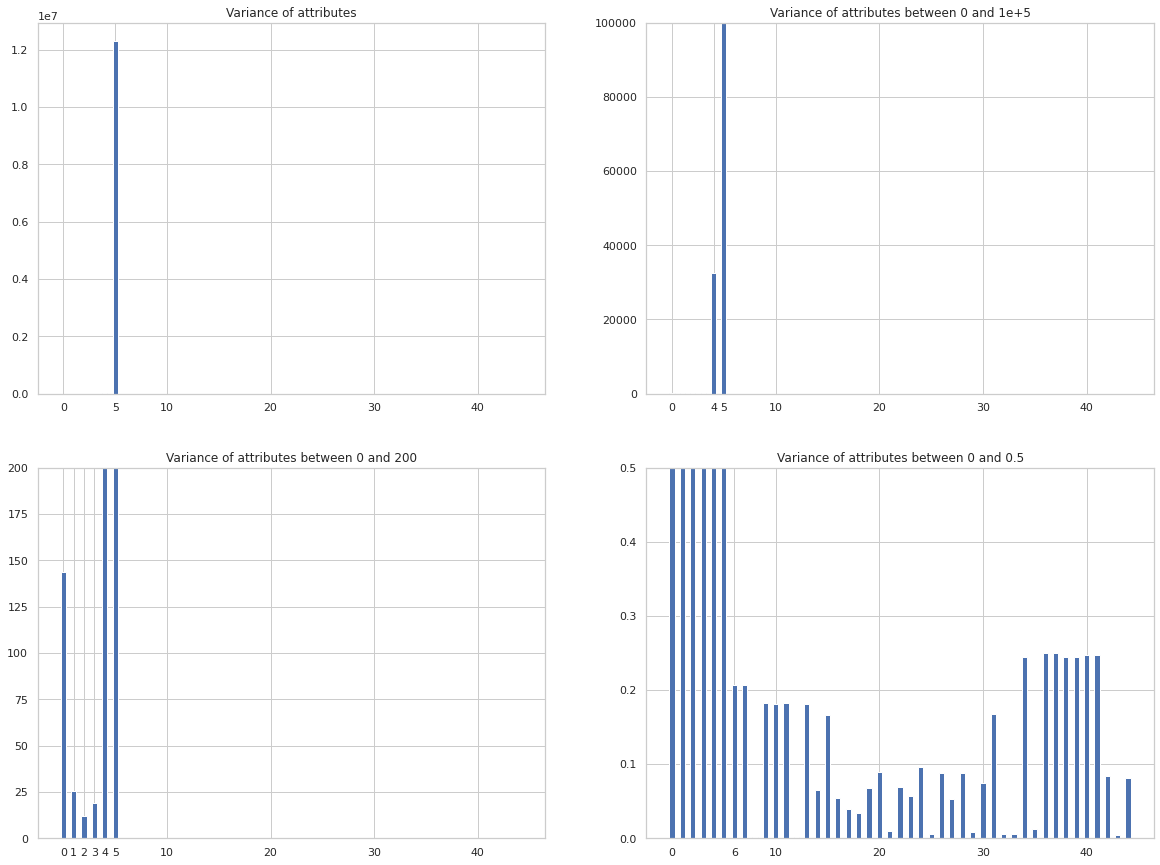

In [ ]:
import matplotlib.pyplot as plt

train_variance = X_train.var(axis=0)

fig, axes = plt.subplots(2, 2, figsize = (20, 15))
axes[0][0].bar(range(0, train_variance.shape[0]), train_variance, width = 0.5)
axes[0][0].set_title("Variance of attributes")
axes[0][0].set_xticks([0, 5, 10, 20, 30, 40])

axes[0][1].bar(range(0, train_variance.shape[0]), train_variance, width = 0.5)
axes[0][1].set_ylim([0, 1e+5])
axes[0][1].set_title("Variance of attributes between 0 and 1e+5")
axes[0][1].set_xticks([0, 4, 5, 10, 20, 30, 40])

axes[1][0].bar(range(0, train_variance.shape[0]), train_variance, width = 0.5)
axes[1][0].set_ylim([0, 200])
axes[1][0].set_title("Variance of attributes between 0 and 200")
axes[1][0].set_xticks([0, 1, 2, 3, 4, 5, 10, 20, 30, 40])

axes[1][1].bar(range(0, train_variance.shape[0]), train_variance, width = 0.5)
axes[1][1].set_ylim([0, 0.5])
axes[1][1].set_title("Variance of attributes between 0 and 0.5")
axes[1][1].set_xticks([0, 6, 10, 20, 30, 40])

plt.show()

Παρατηρούμε ότι τα 5 πρώτα χαρακτηριστικά έχουν μεγάλες διακυμάνσεις, ενώ όλα τα υπόλοιπα χαρακτηρίζονται από μικρή διακύμανση, μικρότερη από 0.3. 

Αρχικά, λοιπόν, για την παράμετρο threshold δοκιμάζουμε τιμές στο διάστημα 0 - 0.3 ([0, 0.005, 0.01, 0.03, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.3]) και με GridSearch σε 10-fold cross validation εντοπίζουμε ότι τα καλύτερα ποσοστά accuracy αλλά και f1 score επιτυγχάνονται στο 0.01. Στη συνέχεια, λοιπόν, κάνουμε μια πιο εκτενή αναζήτηση στο διάστημα αυτό, οπότε και δοκιμάζουμε τις τιμές [0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015], από όπου και προκύπτει ως καλύτερη επιλογή η τιμή <b>threshold = 0.01</b>.  

In [ ]:
japanese_credit_screening_gnb = dict()
japanese_credit_screening_gnb['Out of the box'] = {'accuracy' : japanese_credit_screening_cross_val_accuracy_out_of_the_box['gaussian naive bayes'], 'f1' : japanese_credit_screening_cross_val_f1_score_out_of_the_box['gaussian naive bayes']}

In [ ]:
for metric in ['accuracy', 'f1']:
  pipe = Pipeline(steps = [('selector', selector), ('gnb', clf)])
  estimator = GridSearchCV(pipe, dict(selector__threshold = [0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015]), cv = 10, scoring = metric, n_jobs = -1)
  estimator.fit(X_train, y_train)

  for acc, model in zip(estimator.cv_results_['mean_test_score'], estimator.cv_results_['params']):
    print(metric + ' of estimator with threshold =', model['selector__threshold'], str(':'), np.round(acc, 4))
  
  print('\n Best', metric, '=',  np.round(estimator.best_score_, 4), 'corresponds to estimator with threshold =', estimator.best_params_['selector__threshold'], '\n')
  if metric == 'accuracy':
    japanese_credit_screening_gnb['Variance Threshold'] = {'accuracy': np.round(estimator.best_score_, 4)}
  else:
    japanese_credit_screening_gnb['Variance Threshold']['f1'] = np.round(estimator.best_score_, 4)


accuracy of estimator with threshold = 0.008 : 0.8278
accuracy of estimator with threshold = 0.009 : 0.8278
accuracy of estimator with threshold = 0.01 : 0.8341
accuracy of estimator with threshold = 0.011 : 0.8341
accuracy of estimator with threshold = 0.012 : 0.8341
accuracy of estimator with threshold = 0.013 : 0.8341
accuracy of estimator with threshold = 0.014 : 0.832
accuracy of estimator with threshold = 0.015 : 0.832

 Best accuracy = 0.8341 corresponds to estimator with threshold = 0.01 

f1 of estimator with threshold = 0.008 : 0.7942
f1 of estimator with threshold = 0.009 : 0.7942
f1 of estimator with threshold = 0.01 : 0.8025
f1 of estimator with threshold = 0.011 : 0.8025
f1 of estimator with threshold = 0.012 : 0.8025
f1 of estimator with threshold = 0.013 : 0.8025
f1 of estimator with threshold = 0.014 : 0.802
f1 of estimator with threshold = 0.015 : 0.802

 Best f1 = 0.8025 corresponds to estimator with threshold = 0.01 



Για <b>threshold = 0.01</b> παρατηρούμε ότι επιτύχαμε <b>accuracy = 0.8341</b> και <b>f1 = 0.8025</b>, scores λίγο μικρότερα από αυτά που πετυχαίνει ο αντίστοιχος out-of-the-box ταξινομητής. Ωστόσο, όμως, με την τεχνική αυτή του Variance Threshold καταφέραμε να μειώσουμε τη διάσταση των χαρακτηριστικών εισόδου από 46 σε 37, όπως παρατηρούμε παραρακάτω, οπότε και να επιταχύνουμε τις διαδικασίες εκπαίδευσης αλλά και πρόβλεψης του estimator. 

In [ ]:
print('Initial dimension of input attributes:', X_train.shape[1])
print('Dimension of input attributes after Variance Threshold:', VarianceThreshold(threshold = 0.012).fit_transform(X_train).shape[1])

Initial dimension of input attributes: 45
Dimension of input attributes after Variance Threshold: 37


Στα προηγούμενα διαγράμματα παρατηρήσαμε ότι μεταβλητές με μεγάλες μέσες τιμές δίνουν και υψηλές τιμές variance, οπότε και δεν επηρεάζονται από την εφαρμογή χαμηλών κατωφλιών κατά τη Variance Threshold, τα οποία όμως είναι απαραίτητα καθώς τα περισσότερα από τα χαρακτηριστικά έχουν χαμηλές διακυμάνσεις. Για το λόγο αυτό, στη συνέχεια, χρησιμοποιούμε και πάλι την τεχνική Variance Threshold, ωστόσο πριν από αυτήν εφαρμόζουμε έναν Min-Max Scaler, προκειμένου οι τιμές όλων των χαρακτηριστικών να κλιμακώνονται γραμμικά στο διάστημα [0, 1]. Με τον τρόπο αυτό μπορούμε πλέον να κάνουμε μια πιο "δίκαιη" εφαρμογή της Variance Threshold.  

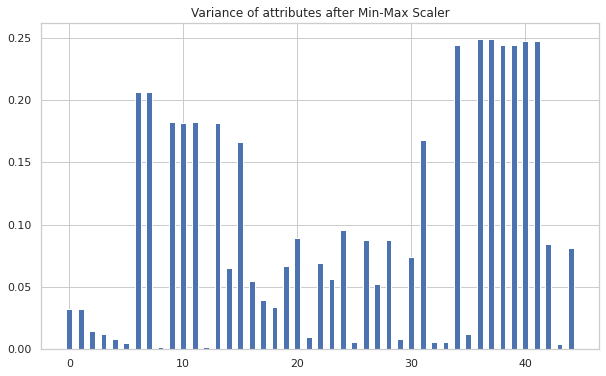

In [ ]:
train_variance = preprocessing.MinMaxScaler().fit_transform(X_train).var(axis=0)

plt.figure(figsize = (10, 6))
plt.bar(range(0, train_variance.shape[0]), train_variance, width = 0.5)
plt.title("Variance of attributes after Min-Max Scaler")
plt.show()

Παρατηρούμε, λοιπόν, ότι μετά την εφαρμογή του Min-Max Scaler τα variances όλων των χαρακτηριστικών εντοπίζονται στο διάστημα 0 - 0.25. Επαναλαμβάνουμε, λοιπόν, GridSearch για το Pipeline (Min-Max Scaler, Variance Threshold, GNB Classifier) δοκιμάζοντας για την παράμετρο threshold αρχικά τις τιμές [0, 0.005, 0.01, 0.03, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25], οπότε και προκύπτει και πάλι ότι για threshold = 0.01 έχουμε τα καλύτερα scores. Στη συνέχεια, επαναλαμβάνουμε την αναζήτηση αλλά αυτή τη φορά για τιμές εστιασμένες κοντά στο 0.01, δηλαδή [0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015]. 

In [ ]:
for metric in ['accuracy', 'f1']:
  pipe = Pipeline(steps = [('minmax_scaler', minmax_scaler), ('selector', selector), ('gnb', clf)])
  estimator = GridSearchCV(pipe, dict(selector__threshold =  [0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015]), cv = 10, scoring = metric, n_jobs = -1)
  estimator.fit(X_train, y_train)

  for acc, model in zip(estimator.cv_results_['mean_test_score'], estimator.cv_results_['params']):
    print(metric + ' of estimator with threshold =', model['selector__threshold'], str(':'), np.round(acc, 4))
  
  print('\n Best', metric, '=',  np.round(estimator.best_score_, 4), 'corresponds to estimator with threshold =', estimator.best_params_['selector__threshold'], '\n')
  if metric == 'accuracy':
    japanese_credit_screening_gnb['MinMax Scaler - Variance Threshold'] = {'accuracy': np.round(estimator.best_score_, 4)}
  else:
    japanese_credit_screening_gnb['MinMax Scaler - Variance Threshold']['f1'] = np.round(estimator.best_score_, 4)

accuracy of estimator with threshold = 0.008 : 0.8341
accuracy of estimator with threshold = 0.009 : 0.8382
accuracy of estimator with threshold = 0.01 : 0.8402
accuracy of estimator with threshold = 0.011 : 0.8402
accuracy of estimator with threshold = 0.012 : 0.8402
accuracy of estimator with threshold = 0.013 : 0.8361
accuracy of estimator with threshold = 0.014 : 0.8382
accuracy of estimator with threshold = 0.015 : 0.8445

 Best accuracy = 0.8445 corresponds to estimator with threshold = 0.015 

f1 of estimator with threshold = 0.008 : 0.8065
f1 of estimator with threshold = 0.009 : 0.8124
f1 of estimator with threshold = 0.01 : 0.8127
f1 of estimator with threshold = 0.011 : 0.8127
f1 of estimator with threshold = 0.012 : 0.8139
f1 of estimator with threshold = 0.013 : 0.808
f1 of estimator with threshold = 0.014 : 0.8128
f1 of estimator with threshold = 0.015 : 0.8179

 Best f1 = 0.8179 corresponds to estimator with threshold = 0.015 



Από την παραπάνω διαδικασία προέκυψε τελικά ότι τα καλύτερα accuracy και f1 scores κατά τη διαδικασία του 10-fold cross validation επιτυγχάνονται για <b>threshold = 0.015</b> και αντιστοιχούν σε <b>accuracy = 0.8445</b> και <b>f1 score = 0.8179</b>. Μάλιστα, παρατηρούμε ότι τα ποσοστά αυτά είναι καλύτερα από τα ποσοστά που εξασφάλισε ο αντίστοιχος estimator χωρίς τη χρήση του Min-Max Scaler (Variance Theshold, GNB).
Παράλληλα, στην περίπτωση αυτή, μέσω της τεχνικής μείωσης της διαστατικότητας με επιλογή χαρακτηριστικών, Variance Threshold, καταφέραμε να μειώσουμε τη διάσταση των χαρακτηριστικών εισόδου από 46 σε 36. 

In [ ]:
print('Initial dimension of input attributes:', X_train.shape[1])
p = Pipeline(steps = [('minmax_scaler', preprocessing.MinMaxScaler()), ('selector',  VarianceThreshold(threshold = 0.01))])
print('Dimension of input attributes after Variance Threshold:', p.fit_transform(X_train).shape[1])

Initial dimension of input attributes: 45
Dimension of input attributes after Variance Threshold: 36


Στο σημείο αυτό αξίζει να σημειώσουμε ότι η χρήση του Standard Scaler στη θέση του Min-Max Scaler δεν έχει νόημα, καθώς μετά την εφαρμογή ενός standard scaler transformation όλα τα χαρακτηριστικά θα έχουν variance ίσο με 1. Δοκιμάζουμε, λοιπόν, να χρησιμοποιήσουμε μόνο κανονικοποίηση με Standard Scaler πριν τον Gaussian Naive Bayes Classifier, αλλά παρατηρούμε ότι τα scores που επιτυγγχάνει κατά το 10-fold cross validation o estimator που προκύπτει από τον παραπάνω συνδυασμό (StandardScaler, GNB) είναι αρκετά χαμηλότερα από τα προηγούμενα (όπως φαίνεται παρακάτω). 

In [ ]:
from sklearn.model_selection import cross_val_score

for metric in ['accuracy', 'f1']:
  pipe = Pipeline(steps = [('standard_scaler', standard_scaler), ('gnb', clf)])
  scores = cross_val_score(pipe, X_train, y_train, cv = 10, scoring = metric)
  print(metric + ' of estimator:', np.round(np.average(scores), 4))

  if metric == 'accuracy':
    japanese_credit_screening_gnb['Standard Scaler'] = {'accuracy': np.round(np.average(scores), 4)}
  else:
    japanese_credit_screening_gnb['Standard Scaler']['f1'] = np.round(np.average(scores), 4)

accuracy of estimator: 0.6955
f1 of estimator: 0.5044


Ακόμα όμως και στον estimator που μέχρι στιγμής μας έχει εξασφαλίσει τα καλύτερα scores, δηλαδή (Min-Max Scaler, Variance Threshold, GNB), παρατηρούμε ότι η διάσταση των χαρακτηριστικών εισόδου (36) είναι αρκετά μεγάλη, συγκριτικά μάλιστα με το μικρό αριθμό δειγμάτων, 483, από τα οποία αποτελείται το train dataset μας. Στη γενική περίπτωση, σε ένα binary πρόβλημα ταξινόμησης, όπως στο συγκεκριμένο task, για n-διάστατα χαρακτηριστικά εισόδου χρειαζόμαστε περίπου n$^{2}$ δείγματα, συνθήκη η οποία δεν ικανοποιείται στην περίπτωσή μας καθώς απαιτούνται προσεγγιστικά τουλάχιστον 1296 δείγματα, για να υπάρχουν οι προϋποθέσεις, τουλάχιστον, για την επίτευξη μιας όσον το δυνατόν καλύτερης απόδοσης για τον ταξινομητή, ενώ εμείς έχουμε στη διάθεσή μας μόνο 483 δείγματα. Για το λόγο αυτά, επιπρόσθετα με τις τεχνικές που έχουμε χρησιμοποιήσει μέχρι τώρα, θα χρησιμοποιήσουμε και την τεχνική εξαγωγής χαρακτηριστικών PCA, μέσω της οποιάς θα προσπαθήσουμε να μειώσουμε ακόμα περισσότερο τη διάσταση των χαρακτηριστικών εισόδου. 

Εκτελούμε, λοιπόν, αναζήτηση πλέγματος με διασταυρούμενη επικύρωση για την αρχιτεκτονική (Min-Max Scaler, Variance Threshold, PCA, GNB) δοκιμάζοντας αρχικά ως τιμές παραμέτρων τις ακόλουθες threshold = [0, 0.005, 0.01, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.3] και PCA_components = [1, 2, 3, 5, 10, 15, 20, 30, 40], οπότε και προκύπτει ότι τα καλύτερα accuracy και f1 scores επιτυγχάνονται για threshold = 0.005 και 10 κύριες συνιστώσες για την PCA. Στη συνέχεια, λοιπόν, εκτελούμε μια πιο εντοπισμένη αναζήτηση πλέγματος κοντά στις τιμές αυτές, οπότε και δοκιμάζουμε τις ακόλουθες τιμές παραμέτρων threshold = [0.003, 0.004, 0.005, 0.006, 0.007] και PCA_components = [8, 9, 10, 11, 12]. 

In [ ]:
for metric in ['accuracy', 'f1']:
  pipe = Pipeline(steps = [('minmax_scaler', minmax_scaler), ('selector', selector), ('pca', pca), ('gnb', clf)])
  estimator = GridSearchCV(pipe, dict(selector__threshold = [0.003, 0.004, 0.005, 0.006, 0.007], pca__n_components = [8, 9, 10, 11, 12]), cv = 10, scoring = metric, n_jobs = -1)
  estimator.fit(X_train, y_train)

  for acc, model in zip(estimator.cv_results_['mean_test_score'], estimator.cv_results_['params']):
    print(metric + ' of estimator with threshold =', model['selector__threshold'], 'and PCA_components =', model['pca__n_components'], str(':'), np.round(acc, 4))
  
  print('\n Best', metric, '=',  np.round(estimator.best_score_, 4), 'corresponds to estimator with threshold =', estimator.best_params_['selector__threshold'], 'and PCA_components =',estimator.best_params_['pca__n_components'], '\n')
  if metric == 'accuracy':
    japanese_credit_screening_gnb['MinMax Scaler - Variance Threshold - PCA'] = {'accuracy': np.round(estimator.best_score_, 4)}
  else:
    japanese_credit_screening_gnb['MinMax Scaler - Variance Threshold - PCA']['f1'] = np.round(estimator.best_score_, 4)

accuracy of estimator with threshold = 0.003 and PCA_components = 8 : 0.8529
accuracy of estimator with threshold = 0.004 and PCA_components = 8 : 0.8529
accuracy of estimator with threshold = 0.005 and PCA_components = 8 : 0.8529
accuracy of estimator with threshold = 0.006 and PCA_components = 8 : 0.8529
accuracy of estimator with threshold = 0.007 and PCA_components = 8 : 0.8529
accuracy of estimator with threshold = 0.003 and PCA_components = 9 : 0.8467
accuracy of estimator with threshold = 0.004 and PCA_components = 9 : 0.8467
accuracy of estimator with threshold = 0.005 and PCA_components = 9 : 0.8467
accuracy of estimator with threshold = 0.006 and PCA_components = 9 : 0.8467
accuracy of estimator with threshold = 0.007 and PCA_components = 9 : 0.8467
accuracy of estimator with threshold = 0.003 and PCA_components = 10 : 0.8508
accuracy of estimator with threshold = 0.004 and PCA_components = 10 : 0.8508
accuracy of estimator with threshold = 0.005 and PCA_components = 10 : 0.8

Με βάση τις παραπάνω δοκιμές καταλήγουμε στο συμπέρασμα ότι για την αρχιτεκτονική (Min-Max Scaler, Variance Threshold, PCA, GNB) οι καλύτερες τιμές παραμέτρων αντιστοιχούν σε <b>threshold = 0.03</b> και <b>PCA_components = 8</b>, και με αυτές επιτυγχάνουμε τα καλύτερα scores με <b>accuracy = 0.8529</b> και <b>f1 = 0.8293</b>, ενώ παράλληλα έχουμε πλέον μειώσει σημαντικά τη διάσταση των χαρακτηριστικών εισόδου από 46 σε 8. 

Τέλος, καθώς παρατηρούμε ότι η προσθήκη της PCA είχε αρκετά καλή συνεισφορά, ελέγχουμε εάν από μόνη της θα είχε αντίστοιχα αποτελέσματα, ή ο συνδυασμός της με τις υπόλοιπες τεχνικές pre-processing είναι αυτός που εξασφαλίζει τα σχετικά υψηλά scores. Για το σκοπό αυτό εκτελούμε αναζήτηση πλέγματος με διασταυρούμενη επικύρωση στην αρχιτεκτονική με μόνο μετασχηματιστή την PCA, δηλαδή (PCA, GNB) δοκιμάζοντας ως τιμές για τις συνιστώσες της PCA τις ακόλουθες [2, 5, 8, 10, 12, 15, 20, 25, 30]. Παράλληλα, δοκιμάζουμε να κανονικοποιήσουμε τα χαρακτηριστικά πριν την εφαρμογή της PCA χρησιμοποιώντας τόσο Min-Max Scaler, όσο και Standard Scaler. 

In [ ]:
print('Architecture: PCA \n')
for metric in ['accuracy', 'f1']:
  pipe = Pipeline(steps = [('pca', pca), ('gnb', clf)])
  estimator = GridSearchCV(pipe, dict(pca__n_components = [2, 5, 8, 10, 12, 15, 20, 25, 30]), cv = 10, scoring = metric, n_jobs = -1)
  estimator.fit(X_train, y_train)

  #for acc, model in zip(estimator.cv_results_['mean_test_score'], estimator.cv_results_['params']):
    #print(metric + ' of estimator with PCA_components =', model['pca__n_components'], str(':'), np.round(acc, 4))
  
  print('\n Best', metric, '=',  np.round(estimator.best_score_, 4), 'corresponds to estimator with PCA_components =',estimator.best_params_['pca__n_components'], '\n')

  if metric == 'accuracy':
    japanese_credit_screening_gnb['PCA'] = {'accuracy': np.round(estimator.best_score_, 4)}
  else:
    japanese_credit_screening_gnb['PCA']['f1'] = np.round(estimator.best_score_, 4)

print('\nArchitecture: MinMax Scaler & PCA \n')
for metric in ['accuracy', 'f1']:
  pipe = Pipeline(steps = [('minmax_scaler', minmax_scaler), ('pca', pca), ('gnb', clf)])
  estimator = GridSearchCV(pipe, dict(pca__n_components = [2, 5, 8, 10, 12, 15, 20, 25, 30]), cv = 10, scoring = metric, n_jobs = -1)
  estimator.fit(X_train, y_train)

  #for acc, model in zip(estimator.cv_results_['mean_test_score'], estimator.cv_results_['params']):
    #print(metric + ' of estimator with PCA_components =', model['pca__n_components'], str(':'), np.round(acc, 4))
  
  print('\n Best', metric, '=',  np.round(estimator.best_score_, 4), 'corresponds to estimator with PCA_components =',estimator.best_params_['pca__n_components'], '\n')

  if metric == 'accuracy':
    japanese_credit_screening_gnb['MinMax Scaler - PCA'] = {'accuracy': np.round(estimator.best_score_, 4)}
  else:
    japanese_credit_screening_gnb['MinMax Scaler - PCA']['f1'] = np.round(estimator.best_score_, 4)

print('\nArchitecture: Standard Scaler & PCA \n')
for metric in ['accuracy', 'f1']:
  pipe = Pipeline(steps = [('standard_scaler', standard_scaler), ('pca', pca), ('gnb', clf)])
  estimator = GridSearchCV(pipe, dict(pca__n_components = [2, 5, 8, 10, 12, 15, 20, 25, 30]), cv = 10, scoring = metric, n_jobs = -1)
  estimator.fit(X_train, y_train)

  #for acc, model in zip(estimator.cv_results_['mean_test_score'], estimator.cv_results_['params']):
   #print(metric + ' of estimator with PCA_components =', model['pca__n_components'], str(':'), np.round(acc, 4))
  
  print('\n Best', metric, '=',  np.round(estimator.best_score_, 4), 'corresponds to estimator with PCA_components =',estimator.best_params_['pca__n_components'], '\n')

  if metric == 'accuracy':
    japanese_credit_screening_gnb['Standard Scaler - PCA'] = {'accuracy': np.round(estimator.best_score_, 4)}
  else:
    japanese_credit_screening_gnb['Standard Scaler - PCA']['f1'] = np.round(estimator.best_score_, 4)

Architecture: PCA 


 Best accuracy = 0.7661 corresponds to estimator with PCA_components = 25 


 Best f1 = 0.687 corresponds to estimator with PCA_components = 25 


Architecture: MinMax Scaler & PCA 


 Best accuracy = 0.8529 corresponds to estimator with PCA_components = 8 


 Best f1 = 0.8293 corresponds to estimator with PCA_components = 8 


Architecture: Standard Scaler & PCA 


 Best accuracy = 0.8114 corresponds to estimator with PCA_components = 5 


 Best f1 = 0.7558 corresponds to estimator with PCA_components = 5 



Από τις παραπάνω δοκιμές, παρατηρούμε ότι όταν η PCA συνδυαστεί με κανονικοποίηση των χαρακτηριστικών βελτιώνει αρκετά τα αποτελέσματά της, με το συνδυασμό MinMax Scaler και PCA να επιτυγχάνει μάλιστα scores πολύ κοντά σε αυτά που πετυχαίνει και η αρχιτεκτονική MinMax Scaler, Variance Threshold και PCA.   

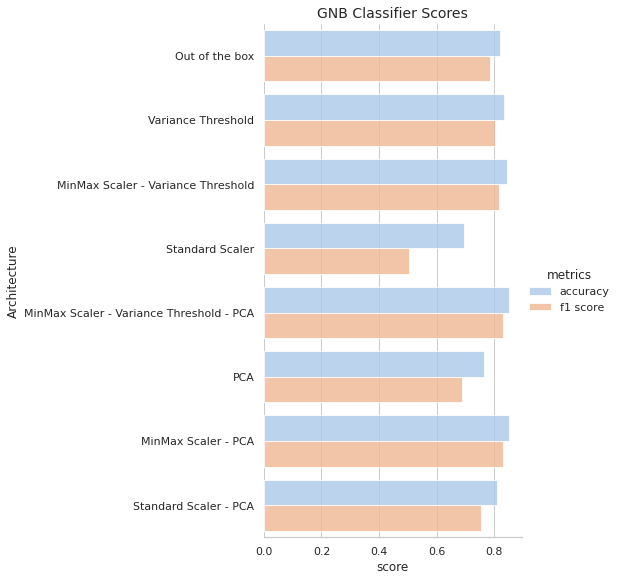

interactive(children=(Dropdown(description='architecture', options=('Out of the box', 'Variance Threshold', 'M…

In [ ]:
gnb_df = pd.DataFrame([[x, 'accuracy', japanese_credit_screening_gnb[x]['accuracy']] for x in japanese_credit_screening_gnb] +
                  [[x, 'f1 score', japanese_credit_screening_gnb[x]['f1']] for x in japanese_credit_screening_gnb], 
                  columns = ['architecture', 'metric', 'score']) 

sns.set_theme(style="whitegrid")
g = sns.catplot(
    data = gnb_df, kind = "bar",
    x = "score", y = "architecture", hue = "metric",
    palette = "pastel", alpha = .8, height = 8
)
g.despine(left=True)
g.ax.set_title("GNB Classifier Scores", fontsize = 14)
g.set_axis_labels("score", "Architecture")
g.legend.set_title("metrics")

from ipywidgets import interact, Dropdown

architecture_gnb = Dropdown(options = japanese_credit_screening_gnb.keys())

@interact(architecture = architecture_gnb)
def print_scores(architecture):
    print('accuracy:', japanese_credit_screening_gnb[architecture]['accuracy'])
    print('f1 score:', japanese_credit_screening_gnb[architecture]['f1'])

<b>Συμπερασματικά, λοιπόν, βέλτιστος παραμένει ο Gaussian Naive Bayes ταξινομητής χωρίς την προσθήκη κάποιου μετασχηματιστή πριν από αυτόν, ενώ πολύ κοντά σε αυτόν βρίσκεται και η αρχιτεκτονική MinMax Scaler - Variance Threshold (theshold = 0.03) - PCA (n_components = 8) - GNB η οποία επιτυγχάνει accuracy 0.8529 και f1 score 0.8293 κατά τη διαδικασία του 10-fold cross validation.</b>

##### kNeirestNeighbors (kNN) Classifier

Ο kNN ταξινομητής της βιβλιοθήκης scikit-learn δέχεται τι ακόλουθες παραμέτρους:
- n_neighbors: o αριθμός των γειτόνων που θα χρησιμοποιηθούν
- weights: συνάρτηση που καθορίζει το βάρος κάθε γείτονα που θα χρησιμοποιηθεί κστά την πρόβλεψη. Πιθανές τιμές:
  - 'uniform': Όλα τα σημεία σε μια γειτονιά έχουν ίσα βάρη
  - 'distance': Τα βάρη των σημείων είναι ανάλογα του αντιστρόφου της απόστασής τους, οπότε κοντινότεροι γείτονες έχουν μεγαλύτερη επιρροή συγκριτικά με τους πιο μακρινούς.
- algorithm: Ο αλγόριθμος που χρησιμοποιείται για τον υπολογισμό των κοντινότερων γειτόνων. Πιθανές τιμές:
  - 'ball_tree': χρήση του BallTree
  - 'kd_tree': χρήση του KDTree
  - 'brute': χρήση brute-force search
  - 'auto': προσπάθεια να εντοπίσουμε τον πιο κατάλληλο αλγόριθμο με βάση τις τιμές που περνάμε στη μέθοδο predict του ταξινομητή.
- 'leaf_size': Η παράμετρος αυτή απαιείται κατά τη χρήση BallTree ή KDTree. Μπορεί να επηρεάσει την ταχύτητα κατασκευής, καθώς και τη μνήμη που απαιτείται για την αποθήκευση του δέντρου. (Η βέλτιστη τιμή εξαρτάται από τη φύση του προβλήματος).
- 'p': Δυναμική παράμετρος για τη μετρική Minkowski. Η τιμή p = 1 αντιστοιχεί στη χρήση της απόσταση manhattan, ενώ η p = 2 στην ευκλείδια απόσταση.
- 'metric': Η μετρική απόστασης που χρησιμοιείται για το δέντρο.

O kNN ταξινομητής, χωρίς καμία βελτιστοποίηση (out-of-the-box) και με όλες τις παραμέτρους σε default τιμές, δηλαδή με n_neighbors = 5, weights = 'uniform', algorithm = 'auto', p = 2, metric = 'minkowski', κατά τη διαδικασία του 10-fold cross validation επιτυγχάνει <b>accuracy 0.6522</b> και <b>f1 score 0.5385</b>.

Αρχικά, θα προσπαθήσουμε να βελτιστοποιήσουμε τις αποδόσεις του kNN ταξινομητή (accuracy και f1 score κατά τη δαδικασία 10-fold cross validation), χωρίς να πρσθέσουμε κάποιον μετασχηματιστή πριν την εφαρμογή αυτού. Για το σκοπό αυτό θα εφαρμόσουμε αναζήτηση πλέγματος με διασταυρούμενη επικύρωση μόνο για τις υπερπαραμέτρους του kNN ταξινομητή της scikit-learn. Δοκιμάζουμε, λοιπόν, αρχικά για κάθε μια από τις παραμέτρους του τις ακόλουθες τιμές n_neighbors = [1, 3, 5, 7, 15, 19, 25, 31, 47, 53, 61], weights = ['uniform', 'distance'], metric = ['minkowski', 'chebyshev'] και p = [1, 2] (αφορά την περίπτωση που metric = 'minkowski' με το p = 1 να αντιστοιχεί στην απόσταση 'manhattan' και το p = 2 στην 'euclidean'). Τα αποτελέσματα που προκύπτουν τα απεικονίζουμε στα ακόλουθα διαγράμματα.

In [ ]:
japanese_credit_screening_kNN = dict()
japanese_credit_screening_kNN['Out of the box'] = {'accuracy' : japanese_credit_screening_cross_val_accuracy_out_of_the_box['knn'], 'f1' : japanese_credit_screening_cross_val_f1_score_out_of_the_box['knn']}

In [ ]:
clf = KNeighborsClassifier()

In [ ]:
n_neighbors_list = [1, 3, 5, 7, 15, 19, 25, 31, 47, 53, 61]
weights_list = ['uniform', 'distance']
p_list = [1, 2]
metric_distance_list = ['minkowski', 'chebyshev']
d = {metric_score : {distance : {w : {n : 0 for n in n_neighbors_list} for w in weights_list} for distance in ['manhattan', 'euclidean', 'chebyshev']} for metric_score in ['accuracy', 'f1']}

for metric in ['accuracy', 'f1']:
  estimator = GridSearchCV(clf, dict(n_neighbors = n_neighbors_list, weights = weights_list, p = p_list, metric = metric_distance_list), cv = 10, scoring = metric, n_jobs = -1)
  estimator.fit(X_train, y_train)

  for acc, model in zip(estimator.cv_results_['mean_test_score'], estimator.cv_results_['params']):
    #print(metric + ' of kNN with n_neighbors =', str(model['n_neighbors']) + ',', 'weights =', "'" + model['weights'] + "', metric = '" + model['metric'] + "'", 'and p =',  model['p'], str(':'), np.round(acc, 4))
    if model['metric'] == 'minkowski':
      if model['p'] == 1:
        d[metric]['manhattan'][model['weights']][model['n_neighbors']] = np.round(acc, 4)
      else:
        d[metric]['euclidean'][model['weights']][model['n_neighbors']] = np.round(acc, 4)
    else:
      d[metric]['chebyshev'][model['weights']][model['n_neighbors']] = np.round(acc, 4)

  print('Best', metric, '=',  np.round(estimator.best_score_, 4), 'corresponds to kNN with n_neighbors =', str(estimator.best_params_['n_neighbors']) + ',', 'weights =', "'" + estimator.best_params_['weights'] + "', metric = '" + estimator.best_params_['metric'] + "'", 'and p =',  estimator.best_params_['p'], '\n')

Best accuracy = 0.7085 corresponds to kNN with n_neighbors = 3, weights = 'uniform', metric = 'minkowski' and p = 1 

Best f1 = 0.6697 corresponds to kNN with n_neighbors = 3, weights = 'uniform', metric = 'minkowski' and p = 1 



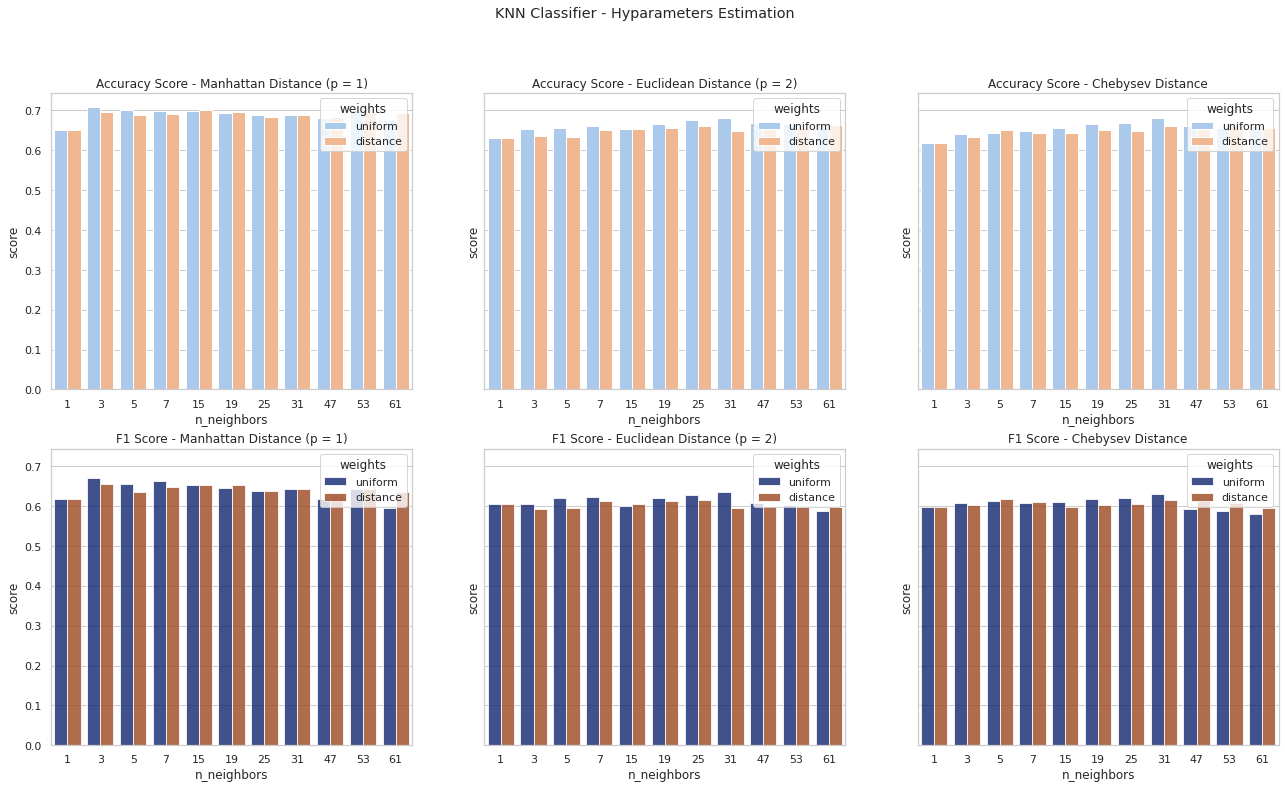

In [ ]:
df_acc_euclidean = pd.DataFrame(
    [[n, w, d['accuracy']['euclidean'][w][n]] for n in n_neighbors_list for w in weights_list],
    columns = ['n_neighbors', 'weights', 'score'])
df_acc_manhattan = pd.DataFrame(
    [[n, w, d['accuracy']['manhattan'][w][n]] for n in n_neighbors_list for w in weights_list],
    columns = ['n_neighbors', 'weights', 'score'])
df_acc_chebyshev = pd.DataFrame(
    [[n, w, d['accuracy']['chebyshev'][w][n]] for n in n_neighbors_list for w in weights_list],
    columns = ['n_neighbors', 'weights', 'score'])
df_f1_euclidean = pd.DataFrame(
    [[n, w, d['f1']['euclidean'][w][n]] for n in n_neighbors_list for w in weights_list],
    columns = ['n_neighbors', 'weights', 'score'])
df_f1_manhattan = pd.DataFrame(
    [[n, w, d['f1']['manhattan'][w][n]] for n in n_neighbors_list for w in weights_list],
    columns = ['n_neighbors', 'weights', 'score'])
df_f1_chebyshev = pd.DataFrame(
    [[n, w, d['f1']['chebyshev'][w][n]] for n in n_neighbors_list for w in weights_list],
    columns = ['n_neighbors', 'weights', 'score'])

fig, axes = plt.subplots(2, 3, figsize = (22, 12), sharey = True)
fig.suptitle('KNN Classifier - Hyparameters Estimation')

sns.set_theme(style = "whitegrid")
sns.barplot(ax = axes[0, 0], data = df_acc_manhattan, x = "n_neighbors", y = "score", hue = "weights", palette = "pastel", alpha = 1)
axes[0, 0].set_title('Accuracy Score - Manhattan Distance (p = 1)')

sns.barplot(ax = axes[0, 1], data = df_acc_euclidean, x = "n_neighbors", y = "score", hue = "weights", palette = "pastel", alpha = 1)
axes[0, 1].set_title('Accuracy Score - Euclidean Distance (p = 2)')

sns.barplot(ax = axes[0, 2], data = df_acc_chebyshev, x = "n_neighbors", y = "score", hue = "weights", palette = "pastel", alpha = 1)
axes[0, 2].set_title('Accuracy Score - Chebysev Distance')

sns.barplot(ax = axes[1, 0], data = df_f1_manhattan, x = "n_neighbors", y = "score", hue = "weights", palette = "dark", alpha = .8)
axes[1, 0].set_title('F1 Score - Manhattan Distance (p = 1)')

sns.barplot(ax = axes[1, 1], data = df_f1_euclidean, x = "n_neighbors", y = "score", hue = "weights", palette = "dark", alpha = .8)
axes[1, 1].set_title('F1 Score - Euclidean Distance (p = 2)')

sns.barplot(ax = axes[1, 2], data = df_f1_chebyshev, x = "n_neighbors", y = "score", hue = "weights", palette = "dark", alpha = .8)
axes[1, 2].set_title('F1 Score - Chebysev Distance')

plt.show()

Παρατηρούμε, λοιπόν, ότι η χρήση της 'manhattan distance' (αντιστοιχεί σε metric = 'minkowski' και p = 1) συγκριτικά με τις 'euclidean distance' και 'chebysev distance' εξασφαλίζει τα καλύτερα δυνατά accuracy και f1 scores, ενώ παράλληλα η χρήση από 3 εώς 25 γείτονες είναι αρκετά ικανοποιητική. Όσον αφορά τη συνάρτηση βαρών (weights), παρατηρούμε ότι οι χρήσεις 'uniform' (κοινά βάρη για όλoυς τους γείτονες) ή 'distance' (μεγαλύτερη βαρύτητα στους κοντινότερους γείτονες) έχουν μικρές διαφορές. Τελικά, από τη GridSearch προκύπτει ότι ο καλύτερος ταξινομητής αντιστοιχεί σε n_neighbors = 18, weights = 'uniform', metric = 'minkowski' και p = 1, οπότε και στη συνέχεια εκτελούμε μια πιο εντοπισμένη αναζήτηση πλεγματος ως προς τον αριθμό των γειτόνων που χρησιμοποιούμε δοκιμάζοντας περιττές τιμές κοντά στη 15 ([1, 3, 5, 9, 11, 13, 15]) προκειμένου να βελτιστοποιήσουμε και την παράμετρο αυτή.   

In [ ]:
for metric in ['accuracy', 'f1']:
  estimator = GridSearchCV(clf, dict(n_neighbors = [1, 3, 5, 9, 11, 13, 15], weights = ['uniform'], metric = ['minkowski'], p = [1]), cv = 10, scoring = metric, n_jobs = -1)
  estimator.fit(X_train, y_train)

  for acc, model in zip(estimator.cv_results_['mean_test_score'], estimator.cv_results_['params']):
    print(metric + ' of kNN with n_neighbors =', str(model['n_neighbors']), str(':'), np.round(acc, 4))

  print('\n Best', metric, '=',  np.round(estimator.best_score_, 4), 'corresponds to kNN with n_neighbors =', str(estimator.best_params_['n_neighbors']), '\n')
  if metric == 'accuracy':
    japanese_credit_screening_kNN['Best kNN (without transformers)'] = {'accuracy': np.round(estimator.best_score_, 4)}
  else:
    japanese_credit_screening_kNN['Best kNN (without transformers)']['f1'] = np.round(estimator.best_score_, 4)

accuracy of kNN with n_neighbors = 1 : 0.6502
accuracy of kNN with n_neighbors = 3 : 0.7085
accuracy of kNN with n_neighbors = 5 : 0.7
accuracy of kNN with n_neighbors = 9 : 0.7086
accuracy of kNN with n_neighbors = 11 : 0.6922
accuracy of kNN with n_neighbors = 13 : 0.7003
accuracy of kNN with n_neighbors = 15 : 0.6981

 Best accuracy = 0.7086 corresponds to kNN with n_neighbors = 9 

f1 of kNN with n_neighbors = 1 : 0.6191
f1 of kNN with n_neighbors = 3 : 0.6697
f1 of kNN with n_neighbors = 5 : 0.6546
f1 of kNN with n_neighbors = 9 : 0.6629
f1 of kNN with n_neighbors = 11 : 0.6497
f1 of kNN with n_neighbors = 13 : 0.6563
f1 of kNN with n_neighbors = 15 : 0.6519

 Best f1 = 0.6697 corresponds to kNN with n_neighbors = 3 



Τελικά, λοιπόν, προκύπτει ότι ο βέλτιστος kNN ταξινομητής, ο οποίος καταφέρνει να επιτύχει accuracy = 0.7086 και f1 score = 0.6629 κατά τη διαδικασία του 10-fold cross validation αντιστοιχεί σε n_neighbors = 9, weights = 'uniform', metric = 'minkowski' και p = 1. 

Στη συνέχεια, μελετάμε την επίδραση που έχει η τιμή της παραμέτρου 'leaf_size' του kΝΝ ταξινομητή της scikit-learn, και όπως παρατηρούμε στο συγκεκριμένο task με το συγκεκριμένο dataset η τιμή αυτή δεν επηρεάζει τα scores που πετυχαίνει ο ταξινομητής, ενώ παράλληλα δεν παρατηρούμε κάποια ιδιαίτερη επίδραση και στο χρόνο εκπαίδευσης (οπότε και μπορούμε να χρησιμοποιούμε τη default τιμή = 30).

In [ ]:
for metric in ['accuracy', 'f1']:
  estimator = GridSearchCV(clf, dict(n_neighbors = [9], weights = ['uniform'], metric = ['minkowski'], p = [1], leaf_size = [0.1, 10, 30, 80, 150, 400, 600, 1000, 2000, 10000, 1e9]), cv = 10, scoring = metric, n_jobs = -1)
  estimator.fit(X_train, y_train)

  for acc, model, time, std_time in zip(estimator.cv_results_['mean_test_score'], estimator.cv_results_['params'], estimator.cv_results_['mean_fit_time'], estimator.cv_results_['std_fit_time']):
    print('kNN with leaf_size =', str(model['leaf_size']), ':', metric,  '=', np.round(acc, 4), 'and mean fit time =', np.round(time, 4), '(+/-', str(np.round(std_time, 4)) + ')')
  print()

kNN with leaf_size = 0.1 : accuracy = 0.7086 and mean fit time = 0.0009 (+/- 0.0001)
kNN with leaf_size = 10 : accuracy = 0.7086 and mean fit time = 0.0009 (+/- 0.0001)
kNN with leaf_size = 30 : accuracy = 0.7086 and mean fit time = 0.0009 (+/- 0.0001)
kNN with leaf_size = 80 : accuracy = 0.7086 and mean fit time = 0.0009 (+/- 0.0001)
kNN with leaf_size = 150 : accuracy = 0.7086 and mean fit time = 0.001 (+/- 0.0002)
kNN with leaf_size = 400 : accuracy = 0.7086 and mean fit time = 0.001 (+/- 0.0)
kNN with leaf_size = 600 : accuracy = 0.7086 and mean fit time = 0.0009 (+/- 0.0001)
kNN with leaf_size = 1000 : accuracy = 0.7086 and mean fit time = 0.0009 (+/- 0.0001)
kNN with leaf_size = 2000 : accuracy = 0.7086 and mean fit time = 0.001 (+/- 0.0003)
kNN with leaf_size = 10000 : accuracy = 0.7086 and mean fit time = 0.001 (+/- 0.0001)
kNN with leaf_size = 1000000000.0 : accuracy = 0.7086 and mean fit time = 0.0009 (+/- 0.0001)

kNN with leaf_size = 0.1 : f1 = 0.6629 and mean fit time = 0.

Στο σημείο αυτό θα δοκιμάσουμε να προσθέσουμε μετασχηματιστές πριν την εφαρμογή του kNN ταξινομητή, με σκοπό να βελτιώσουμε ακόμα περισσότερο τα scores που αυτός επιτυγχάνει.

Υλοποιούμε και πάλι αρχιτεκτινικές παρόμοιες με αυτές που χρησιμοποιήσαμε και κατά τη διαδικασία του GNB Classifier, οι οποίες συνδυάζουν κανονικοποίηση των χαρακηριστικών (MinMax Scaler ή Standard Scaler) και τεχνικές μείωσης της διαστατικότητας (Variance Threshold ή και PCA). 

Αρχικά, για την αρχιτεκτονική Variance Threshold - kNN εκτελούμε αναζήτηση πλέγματος στην παράμετρο threshold δοκιμάζοντας τις τιμές [0, 0.005, 0.01, 0.03, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.3] καθώς και στις υπερπαραμέτρους του ταξινομητή, παρατηρώντας μια βελτίωση στα accuracy και f1 scores της τάξης του 0.02% για threshold = 0.15. Στη συνέχεια προσθέτουμε στην αρχή της αρχιτεκτονικής αυτής έναν MinMax Scaler, προκειμένου όλα τα χαρακτηριστικά να αποκτήσουν variances στο διάστημα [0, 1], οπότε και να γίνει μια πιο "σωστή" εφαρμογή της Variance Threshold. Εκτελούμε και πάλι αναζήτηση πλέγματος με ίδιες τιμές κατωφλιού, οπότε και προκύπτoυν ως βέλτιστες τιμέ οι threshold = 0.03, n_neighbors = 13 ή 15, weights = 'uniform' και p = 1 ή 2. Έπειτα, επικεντρώουμε τη GridSearch σε τιμές κοντά σε αυτές, οπότε και προκύπτει ότι ο βέλτιστος estimator αντιστοιχεί σε <b>threshold = 0.03</b>, <b>n_neighbors = 11</b>, <b>weights = 'distance'</b>, <b>p = 2</b>(euclidean distance) και επιτυγχάνει <b>accuracy = 0.8739</b> και <b>f1 score = 0.8674</b>, ενώ μειώνει τη διάσταση των χαρακτηριστικώ εισόδου από 46 σε 33. 

In [ ]:
print('Architecture: Variance Threshold - kNN \n')
for metric in ['accuracy', 'f1']:
  pipe = Pipeline(steps = [('selector', selector), ('kNN', KNeighborsClassifier(metric = 'minkowski'))])
  estimator = GridSearchCV(pipe, dict(selector__threshold = [0, 0.005, 0.01, 0.03, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.3], 
                                      kNN__n_neighbors = [9, 11, 13, 15, 19], kNN__weights = ['distance', 'uniform'], kNN__p = [1, 2]), cv = 10, scoring = metric, n_jobs = -1)
  estimator.fit(X_train, y_train)

  #for acc, model in zip(estimator.cv_results_['mean_test_score'], estimator.cv_results_['params']):
    #print(metric + ' of estimator with threshold =', str(model['selector__threshold']) + ",", 'n_neighbors =', str(model['kNN__n_neighbors']) + ", weights = '" + model['kNN__weights'] + "', and p =", model['kNN__p'], str(':'), np.round(acc, 4))
  
  print('\tBest', metric, '=',  np.round(estimator.best_score_, 4), 'corresponds to estimator with threshold =', str(estimator.best_params_['selector__threshold']) + ",", 'n_neighbors =', str(estimator.best_params_['kNN__n_neighbors']) + ", weights = '" + estimator.best_params_['kNN__weights'] + "', and p =", estimator.best_params_['kNN__p'], '\n')
  if metric == 'accuracy':
    japanese_credit_screening_kNN['Variance Threshold'] = {'accuracy': np.round(estimator.best_score_, 4)}
  else:
    japanese_credit_screening_kNN['Variance Threshold']['f1'] = np.round(estimator.best_score_, 4)

Architecture: Variance Threshold - kNN 

	Best accuracy = 0.723 corresponds to estimator with threshold = 0.15, n_neighbors = 11, weights = 'distance', and p = 1 

	Best f1 = 0.6811 corresponds to estimator with threshold = 0.15, n_neighbors = 11, weights = 'distance', and p = 1 



In [ ]:
print('Architecture: MinMax Scaler - Variance Threshold - kNN \n')
for metric in ['accuracy', 'f1']:
  pipe = Pipeline(steps = [('minmax_scaler', minmax_scaler), ('selector', selector), ('kNN', KNeighborsClassifier(n_neighbors = 13, weights = 'distance', metric = 'minkowski', p = 1))])
  estimator = GridSearchCV(pipe, dict(selector__threshold = [0.025, 0.028, 0.03, 0.035, 0.04],
                                      kNN__n_neighbors = [9, 11, 13, 15, 19], kNN__weights = ['distance', 'uniform'], kNN__p = [1, 2]), cv = 10, scoring = metric, n_jobs = -1)
  estimator.fit(X_train, y_train)

  #for acc, model in zip(estimator.cv_results_['mean_test_score'], estimator.cv_results_['params']):
    #print(metric + ' of estimator with threshold =', str(model['selector__threshold']) + ",", 'n_neighbors =', str(model['kNN__n_neighbors']) + ", weights = '" + model['kNN__weights'] + "', and p =", model['kNN__p'], str(':'), np.round(acc, 4))
  
  print('\tBest', metric, '=',  np.round(estimator.best_score_, 4), 'corresponds to estimator with threshold =', str(estimator.best_params_['selector__threshold']) + ",", 'n_neighbors =', str(estimator.best_params_['kNN__n_neighbors']) + ", weights = '" + estimator.best_params_['kNN__weights'] + "', and p =", estimator.best_params_['kNN__p'], '\n')
  if metric == 'accuracy':
    japanese_credit_screening_kNN['MinMax Scaler - Variance Threshold'] = {'accuracy': np.round(estimator.best_score_, 4)}
  else:
    japanese_credit_screening_kNN['MinMax Scaler - Variance Threshold']['f1'] = np.round(estimator.best_score_, 4)

Architecture: MinMax Scaler - Variance Threshold - kNN 

	Best accuracy = 0.8739 corresponds to estimator with threshold = 0.03, n_neighbors = 13, weights = 'distance', and p = 2 

	Best f1 = 0.8674 corresponds to estimator with threshold = 0.03, n_neighbors = 13, weights = 'distance', and p = 2 



In [ ]:
print('Initial dimension of input attributes:', X_train.shape[1])
p = Pipeline(steps = [('minmax_scaler', preprocessing.MinMaxScaler()), ('selector',  VarianceThreshold(threshold = 0.03))])
print('Dimension of input attributes after MinMax Scaler - Variance Threshold:', p.fit_transform(X_train).shape[1])

Initial dimension of input attributes: 46
Dimension of input attributes after MinMax Scaler - Variance Threshold: 33


Στη συνέχεια, υλποιούμε την αρχιτεκτονική MinMax Scaler - Variance Threshold - PCA - kNN και εκτελούμε αναζήτηση πλέγματος με διασταυρούμενη επικύρωση για τιμές threshold = [0, 0.005, 0.01, 0.03, 0.05, 0.08, 0.1, 0.15, 0.2, 0.21, 0.23, 0.25], PCA_components = [1, 2, 3, 5, 10, 15, 20, 30, 40], n_neighbors = [9, 11, 13, 15, 19], weights = ['distance', 'uniform'], p = [1, 2], οπότε και προκύπτουν οι βέλτιστες τιμές threshold = 0.01 ή 0.03, n_neighbors = 11 ή 13, weights = 'uniform', p = 2 και PCA_components = 30. Εκτελούμε και πάλι ένα πιο εντοπισμένο GridSearch κοντά στις τιμές αυτές, οποτε και τελικά προκύπτει ότι ο βέλτιστος estimator αντιστοιχεί σε <b>threshold = 0.01</b>, <b>n_neighbors = 11</b>, <b>weights = 'uniform'</b>, <b>p = 2</b> και <b>PCA_components = 26</b> και επιτυγχάνει <b>accuracy = 0.8676</b> και <b>f1 score = 0.8602</b>. Παρατηρούμε, λοιπόν, ότι η αρχιτεκτονική αυτή επιτυγχάνει λίγο χαμηλότερα ποσοστά από την προηγούμενη, μόνο που στην περίπτωση της εισάγουμε μια ακόμα τεχνική εξαγωγής χαρακτηριστικών (PCA) η οποία προφανώς αυξάνει το χρόνο που απαιτείται για την εκπαιδευση του μοντέλου, αλλά πιθανώς μειώνει το χρόνο που θα απαιτείται για την πρόβλεψη, καθώς μειώνει λίγο παραπάνω από πριν, σε 26, τη διασταση των χαρακτηριστικών εισόδου (γεγονός που στον kNN ταξινομητή παίζει ρόλο καθώς για κάθε πρόβλεψη απαιτείται ο υπολογισμός των αποστάσεων του τρέχοτος δείγματος με όλα τα δείγματα του train set).   

In [ ]:
print('Architecture: MinMax Scaler - Variance Threshold - PCA - kNN \n')
for metric in ['accuracy', 'f1']:
  pipe = Pipeline(steps = [('minmax_scaler', minmax_scaler), ('selector', selector), ('pca', pca), ('kNN', KNeighborsClassifier(metric = 'minkowski'))])
  estimator = GridSearchCV(pipe, dict(selector__threshold =  [0.01, 0.015, 0.02, 0.03, 0.035], 
                                      pca__n_components = [26, 28, 30, 32, 34],
                                      kNN__n_neighbors = [11, 13], kNN__weights = ['uniform'], kNN__p = [2]), cv = 10, scoring = metric, n_jobs = -1)
  estimator.fit(X_train, y_train)

  #for acc, model in zip(estimator.cv_results_['mean_test_score'], estimator.cv_results_['params']):
    #print(metric + ' of estimator with threshold =', str(model['selector__threshold']) + ",", 'n_neighbors =', str(model['kNN__n_neighbors']) + ", weights = '" + model['kNN__weights'] + "', p =", model['kNN__p'], 'and PCA_components =', model['pca__n_components'], str(':'), np.round(acc, 4))
  
  print('\n \tBest', metric, '=',  np.round(estimator.best_score_, 4), 'corresponds to estimator with threshold =', str(estimator.best_params_['selector__threshold']) + ",", 'n_neighbors =', str(estimator.best_params_['kNN__n_neighbors']) + ", weights = '" + estimator.best_params_['kNN__weights'] + "', p =", estimator.best_params_['kNN__p'], 'and PCA_components =', estimator.best_params_['pca__n_components'], '\n')
  if metric == 'accuracy':
    japanese_credit_screening_kNN['MinMax Scaler - Variance Threshold - PCA'] = {'accuracy': np.round(estimator.best_score_, 4)}
  else:
    japanese_credit_screening_kNN['MinMax Scaler - Variance Threshold - PCA']['f1'] = np.round(estimator.best_score_, 4)

Architecture: MinMax Scaler - Variance Threshold - PCA - kNN 


 	Best accuracy = 0.8676 corresponds to estimator with threshold = 0.01, n_neighbors = 11, weights = 'uniform', p = 2 and PCA_components = 26 


 	Best f1 = 0.8602 corresponds to estimator with threshold = 0.01, n_neighbors = 11, weights = 'uniform', p = 2 and PCA_components = 26 



Τέλος, δοκιμάζουμε κάποιες ακόμα αρχιτεκτονικές που χρησιμοποιούν την τεχνικη εξαγωγής χαρακτηριστικών - PCA, οι οποίες όμως δεν καταφέρνουν να ξεπεράσουν τα ποσοστά που επιτύχαμε παραπάνω. 

In [ ]:
print('Architecture: MinMax Scaler - PCA - kNN \n')
for metric in ['accuracy', 'f1']:
  pipe = Pipeline(steps = [('minmax_scaler', minmax_scaler), ('pca', pca), ('kNN', KNeighborsClassifier(metric = 'minkowski'))])
  estimator = GridSearchCV(pipe, dict(pca__n_components = [1, 2, 3, 5, 10, 15, 20, 30, 40],
                                      kNN__n_neighbors = [9, 11, 13, 15, 19], kNN__weights = ['distance', 'uniform'], kNN__p = [1, 2]), cv = 10, scoring = metric, n_jobs = -1)
  estimator.fit(X_train, y_train)

  #for acc, model in zip(estimator.cv_results_['mean_test_score'], estimator.cv_results_['params']):
    #print(metric + ' of estimator with n_neighbors =', str(model['kNN__n_neighbors']) + ", weights = '" + model['kNN__weights'] + "', p =", model['kNN__p'], 'and PCA_components =', model['pca__n_components'], str(':'), np.round(acc, 4))
  
  print('\n \tBest', metric, '=',  np.round(estimator.best_score_, 4), 'corresponds to estimator with n_neighbors =', str(estimator.best_params_['kNN__n_neighbors']) + ", weights = '" + estimator.best_params_['kNN__weights'] + "', p =", estimator.best_params_['kNN__p'], 'and PCA_components =', estimator.best_params_['pca__n_components'], '\n')
  if metric == 'accuracy':
    japanese_credit_screening_kNN['MinMax Scaler - PCA'] = {'accuracy': np.round(estimator.best_score_, 4)}
  else:
    japanese_credit_screening_kNN['MinMax Scaler - PCA']['f1'] = np.round(estimator.best_score_, 4)

print('\nArchitecture: Standard Scaler - PCA - kNN \n')
for metric in ['accuracy', 'f1']:
  pipe = Pipeline(steps = [('standard_scaler', standard_scaler), ('pca', pca), ('kNN', KNeighborsClassifier(n_neighbors = 13, weights = 'distance', metric = 'minkowski', p = 1))])
  estimator = GridSearchCV(pipe, dict(pca__n_components = [1, 2, 3, 5, 10, 15, 20, 30, 40],
                                      kNN__n_neighbors = [11, 13], kNN__weights = ['uniform'], kNN__p = [2]), cv = 10, scoring = metric, n_jobs = -1)
  estimator.fit(X_train, y_train)

  #for acc, model in zip(estimator.cv_results_['mean_test_score'], estimator.cv_results_['params']):
    #print(metric + ' of estimator with n_neighbors =', str(model['kNN__n_neighbors']) + ", weights = '" + model['kNN__weights'] + "', p =", model['kNN__p'], 'and PCA_components =', model['pca__n_components'], str(':'), np.round(acc, 4))
  
  print('\n \tBest', metric, '=',  np.round(estimator.best_score_, 4), 'corresponds to estimator with n_neighbors =', str(estimator.best_params_['kNN__n_neighbors']) + ", weights = '" + estimator.best_params_['kNN__weights'] + "', p =", estimator.best_params_['kNN__p'], 'and PCA_components =', estimator.best_params_['pca__n_components'], '\n')
  if metric == 'accuracy':
    japanese_credit_screening_kNN['Standard Scaler - PCA'] = {'accuracy': np.round(estimator.best_score_, 4)}
  else:
    japanese_credit_screening_kNN['Standard Scaler - PCA']['f1'] = np.round(estimator.best_score_, 4)

print('\nArchitecture: PCA - kNN \n')
for metric in ['accuracy', 'f1']:
  pipe = Pipeline(steps = [('pca', pca), ('kNN', KNeighborsClassifier(n_neighbors = 13, weights = 'distance', metric = 'minkowski', p = 1))])
  estimator = GridSearchCV(pipe, dict(pca__n_components = [1, 2, 3, 5, 10, 15, 20, 30, 40],
                                      kNN__n_neighbors = [11, 13], kNN__weights = ['uniform'], kNN__p = [2]), cv = 10, scoring = metric, n_jobs = -1)
  estimator.fit(X_train, y_train)

  #for acc, model in zip(estimator.cv_results_['mean_test_score'], estimator.cv_results_['params']):
    #print(metric + ' of estimator with n_neighbors =', str(model['kNN__n_neighbors']) + ", weights = '" + model['kNN__weights'] + "', p =", model['kNN__p'], 'and PCA_components =', model['pca__n_components'], str(':'), np.round(acc, 4))
  
  print('\n \tBest', metric, '=',  np.round(estimator.best_score_, 4), 'corresponds to estimator with n_neighbors =', str(estimator.best_params_['kNN__n_neighbors']) + ", weights = '" + estimator.best_params_['kNN__weights'] + "', p =", estimator.best_params_['kNN__p'], 'and PCA_components =', estimator.best_params_['pca__n_components'], '\n')
  if metric == 'accuracy':
    japanese_credit_screening_kNN['PCA'] = {'accuracy': np.round(estimator.best_score_, 4)}
  else:
    japanese_credit_screening_kNN['PCA']['f1'] = np.round(estimator.best_score_, 4)

Architecture: MinMax Scaler - PCA - kNN 


 	Best accuracy = 0.8697 corresponds to estimator with n_neighbors = 15, weights = 'uniform', p = 1 and PCA_components = 20 


 	Best f1 = 0.8616 corresponds to estimator with n_neighbors = 19, weights = 'distance', p = 2 and PCA_components = 15 


Architecture: Standard Scaler - PCA - kNN 


 	Best accuracy = 0.8471 corresponds to estimator with n_neighbors = 11, weights = 'uniform', p = 2 and PCA_components = 15 


 	Best f1 = 0.836 corresponds to estimator with n_neighbors = 11, weights = 'uniform', p = 2 and PCA_components = 15 


Architecture: PCA - kNN 


 	Best accuracy = 0.6901 corresponds to estimator with n_neighbors = 11, weights = 'uniform', p = 2 and PCA_components = 1 


 	Best f1 = 0.6516 corresponds to estimator with n_neighbors = 11, weights = 'uniform', p = 2 and PCA_components = 2 



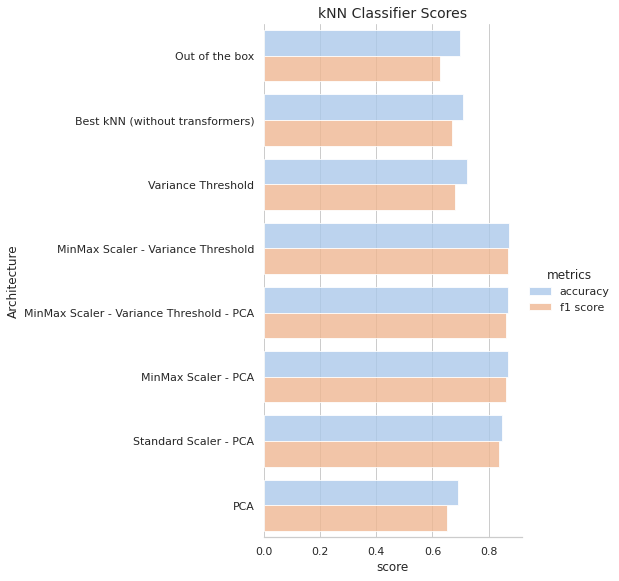

interactive(children=(Dropdown(description='architecture', options=('Out of the box', 'Best kNN (without trans…

In [ ]:
kNN_df = pd.DataFrame([[x, 'accuracy', japanese_credit_screening_kNN[x]['accuracy']] for x in japanese_credit_screening_kNN] +
                  [[x, 'f1 score', japanese_credit_screening_kNN[x]['f1']] for x in japanese_credit_screening_kNN], 
                  columns = ['architecture', 'metric', 'score']) 

sns.set_theme(style = "whitegrid")
g = sns.catplot(
    data = kNN_df, kind = "bar",
    x = "score", y = "architecture", hue = "metric",
    palette = "pastel", alpha = .8, height = 8
)
g.despine(left=True)
g.ax.set_title("kNN Classifier Scores", fontsize = 14)
g.set_axis_labels("score", "Architecture")
g.legend.set_title("metrics")

architecture_kNN = Dropdown(options = japanese_credit_screening_kNN.keys())

@interact(architecture = architecture_kNN)
def print_scores(architecture):
    print('accuracy:', japanese_credit_screening_kNN[architecture]['accuracy'])
    print('f1 score:', japanese_credit_screening_kNN[architecture]['f1'])

<b>Συμπερασματικά, λοιπόν, ο βελτιστοποιημένος kNN ταξινομητής αντιστοιχεί σε αρχιτεκτονική MinMax Scaler - Variance Threshold (threshold = 0.03) - kNN (n_neighbors = 13, weights = 'distance', p = 2 (euclidean distance)) και επιτυγχάνει accuracy = 0.8739 και f1 score = 0.8674 κατά τη διαδικασία του 10-fold cross validation.

##### Logistic Regression (LR) 

Ο Logistic Regression ταξινομητής της scikit-learn δέχεται τις ακόλουθες παραμέτρους:
- penalty: ορίζει τη νόρμα που θα χρησιμοποιηθεί για τον υπολογισμό του λάθους ταξινόμησης (ποινής). Πιθανές τιμές:
  - 'none': δεν προστίθεται καμία ποινή
  - 'l1': χρησιμοποιείται η l1 νόρμα για τον υπολογισμό της ποινής
  - 'l2': χρησιμοποιείται η l2 νόρμα για τον υπολογισμό της ποινής
  - 'elastinet': χρησιμοποιείται η l1 και η l2 νόρμα αθροιστικά 
- dual: Dual or primal formulation. Η dual formulation εφαρμόζεται μόνο για l2 penalty με liblinear solver. Γενικά, προτιμάται dual = False όταν n_samples > n_features.
- tol: ανοχή στα κριτήρια τερματισμού.
- C: αντίστοφη δύναμη κανονικοποίησης. Πρέπει να είναι θετικός πραγματικός αριθμός, με μικρότερες τιμές να αντιστοιχούν σε ισχυρότερη κανονικοποίηση.
- fit_intercept: ορίζει εάν πρέπει να προστεθεί σταθερά (bias ή intercept) στη συνάρτηση απόφασης.
- intercept_scaling: χρήσιμο μόνο όταν χρησιμοποιείται liblinear solver με fit_intercept = True. Στην περίπτωση αυτή το x γίνεται [x, intercept_scaling], δηλαδή ένα "συνθετικό" χαρακτηριστικό με σταθερή τιμή ίση με intercept_scaling προστίθεται στο διάνυσμα του δείγματος. Το intercept γίνεται intercept_scaling * synthetic_feature_weight. (Σημείωση: To synthetic_feature_weight υπόκειται σε κανονικοποίηση με l1/l2, όπως και τα υπόλοιπα χαρακτηριστικά. Για να μειωθεί η επίδραση της κανονικοποίησης στο βάρος του "συνθετικού" χαρακτηριστικού (και επομένως και στο intercept - σημείο τομής) πρέπει να αυξηθεί το intercept_scaling).
- class_weight: τα βάρη που αντιστοιχούν σε κάθε κλάση. Εάν δε δίνεται, θεωρείται ότι όλες οι κλάσεις έχουν μοναδιαίο βάρος, ενώ η τιμή 'balanced' προσαρμόζει αυτόματα τα βάρη ώστε να είναι αντιστρόφως ανάλογα με τη συχνότητα εμφάνισης των κλάσεων στα δεδομένα.
- solver: ο αλγόριθμος που χρησιμοποιείται για το πρόβλημα βελτιστοποίησης. Πιθανές τιμές (με τα αντίστοιχα penalty που υποστηρίζει καθένας από αυτούς):
  - 'newton-cg' (υποστηρίζει ['l2', 'none'])
  - 'lbfgs' (υποστηρίζει ['l2', 'none'])
  - 'liblinear' (υποστηρίζει ['l1', 'l2'])
  - 'sag' (υποστηρίζει ['l2', 'none'])
  - 'saga' (υποστηρίζει ['elasticnet', 'l1', 'l2', 'none'])

  Για μικρά datasets, ο 'liblinear' προτιμάται, ενώ σε μεγαλύτερα datasets οι 'sag' και 'saga' είναι ταχύτεροι. Για προβλήματα πολλών κλάσεων δε μπορεί να χρησιμοποιηθεί ο 'liblinear'.  
- max_iter: ο μέγιστος αριθμός επαναλήψεων που μπορεί να εκτελέσει ο solver μέχρι να συγκλίνει.
- multi_class: Πιθανές τιμές: 
  - 'ovr': κάθε label αντιστοιχεί σε ένα δυαδικό πρόβλημα
  - 'multinomial': το σφάλμα που ελαχιστοποιείται είναι το multinomial loss πάνω σε ολόκληρη την πιθανοτική κατανομή (ακόμα και σε binary προβλήματα). Δε μπορεί να χρησιμοποιηθεί για liblinear solver.
  - 'auto': επιλέγει 'ovr' εάν έχουμε binary πρόβλημα ή liblinear solver, διαφορετικά επιλέγει 'multinomial'.
- verbose: θετικός αριθμός που καθορίζει το verbosity για liblinear και lbgfs solver
- warm_start: η τιμή True δηλώνει ότι η λύση της προηγούμενης κλήσης θα χρησιμοποιηθεί ως αρχικοποιήση, διαφορετικά (για την τιμή False) διαγράφεται (η χρήση του δεν έχει νόημα για liblinear solver)
- l1_ratio: χρησιμοποιείται μόνο για penalty = 'elasticnet'. Παίρνει τιμές στο [0, 1] και l1_ration = 0 αντιστοιχεί σε penalty = 'l1', l1_ratio = 1 σε penalty = 'l2' και 0 < l1_ratio < 1 σε συνδυασμό των l1 και l2.



O Logistic Regression ταξινομητής, χωρίς καμία βελτιστοποίηση (out-of-the-box) και με όλες τις παραμέτρους σε default τιμές, δηλαδή με penalty = 'l2', dual = False, tol = 1e-4, C = 1.0, fit_intercept = True, intercept_scaling = 1.0, class_weight = None, solver = 'lbfgs', max_iter = 100, verbose = 0, warm_start = False, l1_ratio = None, κατά τη διαδικασία του 10-fold cross validation επιτυγχάνει <b>accuracy 0.8446</b> και <b>f1 score 0.8262</b>.

In [ ]:
japanese_credit_screening_LR = dict()
japanese_credit_screening_LR['Out of the box'] = {'accuracy' : japanese_credit_screening_cross_val_accuracy_out_of_the_box['logistic regression'], 'f1' : japanese_credit_screening_cross_val_f1_score_out_of_the_box['logistic regression']}

In [ ]:
clf = LogisticRegression()

Αρχικά, και πάλι, θα προσπαθήσουμε να βελτιστοποιήσουμε τις αποδόσεις του Logistic Regression ταξινομητή (accuracy και f1 score κατά τη δαδικασία 10-fold cross validation), χωρίς να πρσθέσουμε κάποιον μετασχηματιστή πριν την εφαρμογή αυτού. Για το σκοπό αυτό θα εφαρμόσουμε αναζήτηση πλέγματος με διασταυρούμενη επικύρωση μόνο για τις υπερπαραμέτρους του Logistic Regression ταξινομητή της scikit-learn. Δοκιμάζουμε, λοιπόν, αρχικά διαφορετικούς solvers για το optimization problem, δηλαδή solver = ['liblinear', 'sag'], και για καθέναν από αυτούς δοκιμάζουμε διαφορετικές τιμές στις παραμέτρους που χρησιμοποιεί.

Δοκιμάζουμε, πρώτα, τον Logistic Regression Classifier με liblinear solver και τα αποτελέσματα  που προκύπτουν από αναζήτηση πλέγματος στις υπόλοιπες παραμέτρους αυτού παρουσιάζονται στα ακόλουθα διαγράμματα.

In [ ]:
#solver = liblinear
params_liblinear = {'penalty_list' : ['l1', 'l2'], 'tol_list' : [1e-6, 1e-4, 0.1, 0.5, 0.8, 1, 1.2, 1.5],
                    'C_list' : [0.01, 0.08, 0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10, 50], 'intercept_scaling_list' : [1, 10, 50, 100],
                    'class_weight_list' : [None, 'balanced'],  'max_iter_list' : [100, 200, 500, 1000, 5000],
                    'verbose_list' : [0, 5, 10, 15]}

d_liblinear = {metric_score : {penalty : {tol: {C : {intercept_scaling : {w : { iter : {verbose : 0 for verbose in params_liblinear['verbose_list']} for iter in params_liblinear['max_iter_list']} for w in params_liblinear['class_weight_list']} for intercept_scaling in params_liblinear['intercept_scaling_list']} for C in params_liblinear['C_list']} for tol in params_liblinear['tol_list']} for penalty in params_liblinear['penalty_list']} for metric_score in ['accuracy', 'f1']}

for metric in ['accuracy', 'f1']:
  estimator = GridSearchCV(clf, [dict(solver = ['liblinear'], penalty = params_liblinear['penalty_list'], tol = params_liblinear['tol_list'], C = params_liblinear['C_list'], intercept_scaling = params_liblinear['intercept_scaling_list'], class_weight = params_liblinear['class_weight_list'], max_iter = params_liblinear['max_iter_list'], verbose = params_liblinear['verbose_list'])], cv = 10, scoring = metric, n_jobs = -1)
  estimator.fit(X_train, y_train)

  for acc, model in zip(estimator.cv_results_['mean_test_score'], estimator.cv_results_['params']):
    #print(metric + ' of kNN with n_neighbors =', str(model['n_neighbors']) + ',', 'weights =', "'" + model['weights'] + "', metric = '" + model['metric'] + "'", 'and p =',  model['p'], str(':'), np.round(acc, 4))
    d_liblinear[metric][model['penalty']][model['tol']][model['C']][model['intercept_scaling']][model['class_weight']][model['max_iter']][model['verbose']] = np.round(acc, 4)

  print('Best', metric, '=',  np.round(estimator.best_score_, 4), 'corresponds to LR with solver =', estimator.best_params_['solver'] + ',', 'penalty =', "'" + estimator.best_params_['penalty'] + "', tol =", str(estimator.best_params_['tol']) + ', C =', str(estimator.best_params_['C']) + ', intercept_scaling =', str(estimator.best_params_['intercept_scaling']), ', class_weight =',  str(estimator.best_params_['class_weight']) + ', max_iter =', str(estimator.best_params_['max_iter']), 'and verbose =', estimator.best_params_['verbose'], '\n')

Best accuracy = 0.8819 corresponds to LR with solver = liblinear, penalty = 'l1', tol = 1.5, C = 0.1, intercept_scaling = 50 , class_weight = None, max_iter = 500 and verbose = 0 

[LibLinear]Best f1 = 0.8756 corresponds to LR with solver = liblinear, penalty = 'l1', tol = 1.2, C = 0.3, intercept_scaling = 100 , class_weight = balanced, max_iter = 500 and verbose = 5 



In [ ]:
from ipywidgets import interact, Dropdown
from matplotlib import pyplot as plt
import seaborn as sns

tol_choices = Dropdown(options = params_liblinear['tol_list'])
intercept_scaling_choices = Dropdown(options = params_liblinear['intercept_scaling_list'])
verbose_choices = Dropdown(options = params_liblinear['verbose_list'])

@interact(tol = tol_choices, intercept_scaling = intercept_scaling_choices, verbose = verbose_choices)
def print_diagram(tol, intercept_scaling, verbose):
    df_acc_weightNone_l1 = pd.DataFrame(
        [[max_iter, C, d_liblinear['accuracy']['l1'][tol][C][intercept_scaling][None][max_iter][verbose]] for C in params_liblinear['C_list'] for max_iter in params_liblinear['max_iter_list']],
        columns = ['max_iter', 'C', 'score'])
    df_acc_weightNone_l2 = pd.DataFrame(
        [[max_iter, C, d_liblinear['accuracy']['l2'][tol][C][intercept_scaling][None][max_iter][verbose]] for C in params_liblinear['C_list'] for max_iter in params_liblinear['max_iter_list']],
        columns = ['max_iter', 'C', 'score'])
    df_acc_balanced_l1 = pd.DataFrame(
        [[max_iter, C, d_liblinear['accuracy']['l1'][tol][C][intercept_scaling]['balanced'][max_iter][verbose]] for C in params_liblinear['C_list'] for max_iter in params_liblinear['max_iter_list']],
        columns = ['max_iter', 'C', 'score'])
    df_acc_balanced_l2 = pd.DataFrame(
        [[max_iter, C, d_liblinear['accuracy']['l2'][tol][C][intercept_scaling]['balanced'][max_iter][verbose]] for C in params_liblinear['C_list'] for max_iter in params_liblinear['max_iter_list']],
        columns = ['max_iter', 'C', 'score'])
    df_f1_weightNone_l1 = pd.DataFrame(
        [[max_iter, C, d_liblinear['f1']['l1'][tol][C][intercept_scaling][None][max_iter][verbose]] for C in params_liblinear['C_list'] for max_iter in params_liblinear['max_iter_list']],
        columns = ['max_iter', 'C', 'score'])
    df_f1_weightNone_l2 = pd.DataFrame(
        [[max_iter, C, d_liblinear['f1']['l2'][tol][C][intercept_scaling][None][max_iter][verbose]] for C in params_liblinear['C_list'] for max_iter in params_liblinear['max_iter_list']],
        columns = ['max_iter', 'C', 'score'])
    df_f1_balanced_l1 = pd.DataFrame(
        [[max_iter, C, d_liblinear['f1']['l1'][tol][C][intercept_scaling]['balanced'][max_iter][verbose]] for C in params_liblinear['C_list'] for max_iter in params_liblinear['max_iter_list']],
        columns = ['max_iter', 'C', 'score'])
    df_f1_balanced_l2 = pd.DataFrame(
        [[max_iter, C, d_liblinear['f1']['l2'][tol][C][intercept_scaling]['balanced'][max_iter][verbose]] for C in params_liblinear['C_list'] for max_iter in params_liblinear['max_iter_list']],
        columns = ['max_iter', 'C', 'score']) 
    
    fig, axes = plt.subplots(2, 4, figsize = (25, 12), sharey = True)
    fig.suptitle('Logistic Regression Classifier with liblinear solver (tol = ' + str(tol) + ', intercept_scaling = ' + str(intercept_scaling) + ', verbose = ' + str(verbose) + ') - Hyparameters Estimation')

    sns.set_theme(style = "whitegrid")
    sns.barplot(ax = axes[0, 0], data = df_acc_weightNone_l1, x = "max_iter", y = "score", hue = "C", palette = "pastel", alpha = 1)
    axes[0, 0].set_title('Accuracy Score - weights = None - penalty = l1')
    sns.barplot(ax = axes[0, 1], data = df_acc_weightNone_l2, x = "max_iter", y = "score", hue = "C", palette = "pastel", alpha = 1)
    axes[0, 1].set_title('Accuracy Score - weights = None - penalty = l2')
    sns.barplot(ax = axes[0, 2], data = df_acc_balanced_l1, x = "max_iter", y = "score", hue = "C", palette = "pastel", alpha = 1)
    axes[0, 2].set_title('Accuracy Score - weights = balanced - penalty = l1')
    sns.barplot(ax = axes[0, 3], data = df_acc_balanced_l2, x = "max_iter", y = "score", hue = "C", palette = "pastel", alpha = 1)
    axes[0, 3].set_title('Accuracy Score - weights = balanced - penalty = l2')

    sns.barplot(ax = axes[1, 0], data = df_f1_weightNone_l1, x = "max_iter", y = "score", hue = "C", palette = "dark", alpha = 1)
    axes[1, 0].set_title('F1 Score - weights = None - penalty = l1')
    sns.barplot(ax = axes[1, 1], data = df_f1_weightNone_l2, x = "max_iter", y = "score", hue = "C", palette = "dark", alpha = 1)
    axes[1, 1].set_title('F1 Score - weights = None - penalty = l2')
    sns.barplot(ax = axes[1, 2], data = df_f1_balanced_l1, x = "max_iter", y = "score", hue = "C", palette = "dark", alpha = 1)
    axes[1, 2].set_title('F1 Score - weights = balanced - penalty = l1')
    sns.barplot(ax = axes[1, 3], data = df_f1_balanced_l2, x = "max_iter", y = "score", hue = "C", palette = "dark", alpha = 1)
    axes[1, 3].set_title('F1 Score - weights = balanced - penalty = l2')

    plt.show()

interactive(children=(Dropdown(description='tol', options=(1e-06, 0.0001, 0.1, 0.5, 0.8, 1, 1.2, 1.5), value=1…

Από τα παραπάνω διαγράμματα παρατηρούμε ότι για το συγκεκριμένο task και λόγω του μικρού dataset η αύξηση του αριθμόυ των επαναλήψεων που εκτελεί ο liblinear solver μέχρι να συγκλίνει δεν έχει κάποια ιδιαίτερη επίδραση στα τελικά scores που επιτυγχάνονται, ενώ όσον αφορά την παράμετρο κανονικοποιήσης C τα καλύτερα scores αντιστοιχούν σε τιμές μεταξύ 0.1 και 0.3. Παράλληλα παρατηρούμε ότι η χρήση 'l2' penalty συνδυάζεται καλύτερα με χαμηλές τιμές της παραμέτρου tol (μεταξύ 1e-6 και 0.0001), ενώ για υψηλότερες τιμές της παραμέτρου αυτής η χρήση 'l1' penalty υπερτερεί αισθητά. Όσον αφορά την παράμετρο class_weight, η επιλογή None ή balanced φαίνεται να μην επηρεάζει ιδιαίτερα με κάθε μια από τις επιλογές να ταιριάζει καλύτερα και σε κάποιες τιμές του C. Τέλος, όσον αφορά τις παραμέτρους verbose και intercept_scaling παρατηρούμε ότι τροποποιήσεις αυτών έχουν μικρές μόνο διακυμάνσεις στα scores που επιτυγχάνονται, με τις καλύτερες επιλογές να αντιστοιχούν στις τιμές 0, 5 και 100, 500 αντίστοιχα(<i>Σχόλιο: Η παράμετρος intercept_scaling απαιτεί τιμές μεγαλύτερες του μηδενός</i>).

Τελικά, από τη GridSearch προέκυψε ότι για τον ταξινομητή Logistic Regression με liblinear solver το καλύτερο accuracy το επιτυγχάνουμε για penalty = 'l1', tol = 1.5, C = 0.1, intercept_scaling = 50, class_weight = None, max_iter = 500 και verbose = 0, ενώ το καλύτερο f1 score το επιτυγχάνουμε για penalty = 'l1', tol = 1.2, C = 0.3, intercept_scaling = 100 , class_weight = balanced, max_iter = 500 και verbose = 5.

Στη συνέχεια κάνουμε και πάλι μια αναζήτηση πλέγματος για τον Logistic Regression ταξινομητή με liblinear solver με τιμές παραμέτρων εντοπισμένες στα διαστήματα γύρω από αυτές που μόλις εντοπίσαμε.

In [ ]:
#solver = liblinear
params_liblinear2 = {'penalty_list' : ['l1'], 'tol_list' : [1, 1.1, 1.2, 1.3, 1.4, 1.5],
                    'C_list' : [0.1, 0.2, 0.3, 0.4, 0.5], 'intercept_scaling_list' : [50, 70, 80, 100],
                    'class_weight_list' : [None, 'balanced'],  'max_iter_list' : [500],
                    'verbose_list' : [0, 5]}

d_liblinear2 = {metric_score : {penalty : {tol: {C : {intercept_scaling : {w : { iter : {verbose : 0 for verbose in params_liblinear2['verbose_list']} for iter in params_liblinear2['max_iter_list']} for w in params_liblinear2['class_weight_list']} for intercept_scaling in params_liblinear2['intercept_scaling_list']} for C in params_liblinear2['C_list']} for tol in params_liblinear2['tol_list']} for penalty in params_liblinear2['penalty_list']} for metric_score in ['accuracy', 'f1']}
best_liblinear = {metric : [] for metric in ['accuracy', 'f1']}
for metric in ['accuracy', 'f1']:
  estimator = GridSearchCV(clf, [dict(solver = ['liblinear'], penalty = params_liblinear2['penalty_list'], tol = params_liblinear2['tol_list'], C = params_liblinear2['C_list'], intercept_scaling = params_liblinear2['intercept_scaling_list'], class_weight = params_liblinear2['class_weight_list'], max_iter = params_liblinear2['max_iter_list'], verbose = params_liblinear2['verbose_list'])], cv = 10, scoring = metric, n_jobs = -1)
  estimator.fit(X_train, y_train)

  for acc, model in zip(estimator.cv_results_['mean_test_score'], estimator.cv_results_['params']):
    #print(metric + ' of kNN with n_neighbors =', str(model['n_neighbors']) + ',', 'weights =', "'" + model['weights'] + "', metric = '" + model['metric'] + "'", 'and p =',  model['p'], str(':'), np.round(acc, 4))
    d_liblinear2[metric][model['penalty']][model['tol']][model['C']][model['intercept_scaling']][model['class_weight']][model['max_iter']][model['verbose']] = np.round(acc, 4)

  best_liblinear[metric] =  estimator.best_params_
  print('Best', metric, '=',  np.round(estimator.best_score_, 4), 'corresponds to LR with solver =', estimator.best_params_['solver'] + ',', 'penalty =', "'" + estimator.best_params_['penalty'] + "', tol =", str(estimator.best_params_['tol']) + ', C =', str(estimator.best_params_['C']) + ', intercept_scaling =', str(estimator.best_params_['intercept_scaling']), ', class_weight =',  str(estimator.best_params_['class_weight']) + ', max_iter =', str(estimator.best_params_['max_iter']), 'and verbose =', estimator.best_params_['verbose'], '\n')

[LibLinear]Best accuracy = 0.8819 corresponds to LR with solver = liblinear, penalty = 'l1', tol = 1, C = 0.2, intercept_scaling = 50 , class_weight = None, max_iter = 500 and verbose = 5 

Best f1 = 0.8698 corresponds to LR with solver = liblinear, penalty = 'l1', tol = 1.5, C = 0.2, intercept_scaling = 50 , class_weight = balanced, max_iter = 500 and verbose = 0 



In [ ]:
def find_score(metric1, metric2):
  #return metric1 of best estimator trained over metric2 
  return d_liblinear2[metric1][best_liblinear[metric2]['penalty']][best_liblinear[metric2]['tol']][best_liblinear[metric2]['C']][best_liblinear[metric2]['intercept_scaling']][best_liblinear[metric2]['class_weight']][best_liblinear[metric2]['max_iter']][best_liblinear[metric2]['verbose']]

print('Best LR with solver = liblinear corresponds to penalty =', "'" + best_liblinear[metric]['penalty'] + "', tol =", str(best_liblinear[metric]['tol']) + ', C =', str(best_liblinear[metric]['C']) + ', intercept_scaling =', str(best_liblinear[metric]['intercept_scaling']), ', class_weight =',  str(best_liblinear[metric]['class_weight']) + ', max_iter =', str(best_liblinear[metric]['max_iter']), 'and verbose =', estimator.best_params_['verbose'], ':')
print('accuracy =', find_score('accuracy', 'accuracy'))
print('f1 score =', find_score('f1', 'accuracy'))

japanese_credit_screening_LR['Best LR (without transformers)'] = {'accuracy': find_score('accuracy', 'accuracy')}
japanese_credit_screening_LR['Best LR (without transformers)']['f1'] = find_score('f1', 'accuracy')

Best LR with solver = liblinear corresponds to penalty = 'l1', tol = 1.5, C = 0.2, intercept_scaling = 50 , class_weight = balanced, max_iter = 500 and verbose = 0 :
accuracy = 0.8819
f1 score = 0.8431


Στη συνέχεια επαναλαμβάνουμε την ίδια διαδικασία για τον Logistic Regression Classifier χρησιμοποιώντας ως solver τον 'sag'.

In [ ]:
#solver = 'sag'
params_sag = {'penalty' : ['l2', 'none'], 'tol' : [1e-6, 1e-4, 0.1, 0.5, 1, 1.5], 
              'C' : [0.01, 0.08, 0.1, 0.2, 0.5, 1], 
              'class_weight' : [None, 'balanced'], 'multi_class' : ['ovr', 'multinomial'],
              'max_iter' : [100, 200, 500], 'warm_start' : [True, False]}

d_sag = {metric_score : {penalty : {tol: {C : {w : { iter : {multi_class : {warm_start : 0 for warm_start in params_sag['warm_start']} for multi_class in params_sag['multi_class']} for iter in params_sag['max_iter']} for w in params_sag['class_weight']} for C in params_sag['C']} for tol in params_sag['tol']} for penalty in params_sag['penalty']} for metric_score in ['accuracy', 'f1']}

for metric in ['accuracy', 'f1']:
  estimator = GridSearchCV(clf, [dict(solver = ['sag'], penalty = params_sag['penalty'], tol = params_sag['tol'], C = params_sag['C'], class_weight = params_sag['class_weight'], multi_class = params_sag['multi_class'], max_iter = params_sag['max_iter'], warm_start = params_sag['warm_start'])], cv = 10, scoring = metric, n_jobs = -1)
  estimator.fit(X_train, y_train)

  for acc, model in zip(estimator.cv_results_['mean_test_score'], estimator.cv_results_['params']):
    #print(metric + ' of LR with solver =', model['solver'] + ',', 'penalty =', "'" + model['penalty'] + "', tol =", str(model['tol']) + ', C =', str(model['C']) + ', class_weight =',  str(model['class_weight']) + ', multi_class =', model['multi_class'] + ', max_iter =', str(model['max_iter']), 'and warm_start =', model['warm_start'], str(':'), np.round(acc, 4))
    d_sag[metric][model['penalty']][model['tol']][model['C']][model['class_weight']][model['max_iter']][model['multi_class']][model['warm_start']] = np.round(acc, 4)

  print('Best', metric, '=',  np.round(estimator.best_score_, 4), 'corresponds to LR with solver =', estimator.best_params_['solver'] + ',', 'penalty =', "'" + estimator.best_params_['penalty'] + "', tol =", str(estimator.best_params_['tol']) + ', C =', str(estimator.best_params_['C']) + ', class_weight =',  str(estimator.best_params_['class_weight']) + ', multi_class =', estimator.best_params_['multi_class'] + ', max_iter =', str(estimator.best_params_['max_iter']), 'and warm_start =', estimator.best_params_['warm_start'], '\n')

Best accuracy = 0.6978 corresponds to LR with solver = sag, penalty = 'l2', tol = 1e-06, C = 0.01, class_weight = None, multi_class = ovr, max_iter = 100 and warm_start = False 

Best f1 = 0.6502 corresponds to LR with solver = sag, penalty = 'l2', tol = 0.5, C = 0.5, class_weight = balanced, multi_class = ovr, max_iter = 200 and warm_start = True 



In [ ]:
tol_choices = Dropdown(options = params_sag['tol'])
multi_class_choices = Dropdown(options = params_sag['multi_class'])
warm_start_choices = Dropdown(options = params_sag['warm_start'])

@interact(tol = tol_choices, multi_class = multi_class_choices, warm_start = warm_start_choices)
def print_diagram(tol, multi_class, warm_start):
    df_acc_weightNone_l2 = pd.DataFrame(
        [[max_iter, C, d_sag['accuracy']['l2'][tol][C][None][max_iter][multi_class][warm_start]] for C in params_sag['C'] for max_iter in params_sag['max_iter']],
        columns = ['max_iter', 'C', 'score'])
    df_acc_weightNone_none = pd.DataFrame(
        [[max_iter, C, d_sag['accuracy']['none'][tol][C][None][max_iter][multi_class][warm_start]] for C in params_sag['C'] for max_iter in params_sag['max_iter']],
        columns = ['max_iter', 'C', 'score'])
    df_acc_balanced_l2 = pd.DataFrame(
        [[max_iter, C, d_sag['accuracy']['l2'][tol][C]['balanced'][max_iter][multi_class][warm_start]] for C in params_sag['C'] for max_iter in params_sag['max_iter']],
        columns = ['max_iter', 'C', 'score'])
    df_acc_balanced_none = pd.DataFrame(
        [[max_iter, C, d_sag['accuracy']['none'][tol][C]['balanced'][max_iter][multi_class][warm_start]] for C in params_sag['C'] for max_iter in params_sag['max_iter']],
        columns = ['max_iter', 'C', 'score'])
    df_f1_weightNone_l2 = pd.DataFrame(
        [[max_iter, C, d_sag['f1']['l2'][tol][C][None][max_iter][multi_class][warm_start]] for C in params_sag['C'] for max_iter in params_sag['max_iter']],
        columns = ['max_iter', 'C', 'score'])
    df_f1_weightNone_none = pd.DataFrame(
        [[max_iter, C, d_sag['f1']['none'][tol][C][None][max_iter][multi_class][warm_start]] for C in params_sag['C'] for max_iter in params_sag['max_iter']],
        columns = ['max_iter', 'C', 'score'])
    df_f1_balanced_l2 = pd.DataFrame(
        [[max_iter, C, d_sag['f1']['l2'][tol][C]['balanced'][max_iter][multi_class][warm_start]] for C in params_sag['C'] for max_iter in params_sag['max_iter']],
        columns = ['max_iter', 'C', 'score'])
    df_f1_balanced_none = pd.DataFrame(
        [[max_iter, C, d_sag['f1']['none'][tol][C]['balanced'][max_iter][multi_class][warm_start]] for C in params_sag['C'] for max_iter in params_sag['max_iter']],
        columns = ['max_iter', 'C', 'score'])
    
    fig, axes = plt.subplots(2, 4, figsize = (25, 12), sharey = True)
    fig.suptitle('Logistic Regression Classifier with sag solver (tol = ' + str(tol) + ', multi_class = ' + str(multi_class) + ', warm_start = ' + str(warm_start) + ') - Hyparameters Estimation')

    sns.set_theme(style = "whitegrid")
    sns.barplot(ax = axes[0, 0], data = df_acc_weightNone_l2, x = "max_iter", y = "score", hue = "C", palette = "pastel", alpha = 1)
    axes[0, 0].set_title('Accuracy Score - weights = None - penalty = l2')
    sns.barplot(ax = axes[0, 1], data = df_acc_weightNone_none, x = "max_iter", y = "score", hue = "C", palette = "pastel", alpha = 1)
    axes[0, 1].set_title('Accuracy Score - weights = None - penalty = none')
    sns.barplot(ax = axes[0, 2], data = df_acc_balanced_l2, x = "max_iter", y = "score", hue = "C", palette = "pastel", alpha = 1)
    axes[0, 2].set_title('Accuracy Score - weights = balanced - penalty = l2')
    sns.barplot(ax = axes[0, 3], data = df_acc_balanced_none, x = "max_iter", y = "score", hue = "C", palette = "pastel", alpha = 1)
    axes[0, 3].set_title('Accuracy Score - weights = balanced - penalty = none')

    sns.barplot(ax = axes[1, 0], data = df_f1_weightNone_l2, x = "max_iter", y = "score", hue = "C", palette = "dark", alpha = 1)
    axes[1, 0].set_title('F1 Score - weights = None - penalty = l2')
    sns.barplot(ax = axes[1, 1], data = df_f1_weightNone_none, x = "max_iter", y = "score", hue = "C", palette = "dark", alpha = 1)
    axes[1, 1].set_title('F1 Score - weights = None - penalty = none')
    sns.barplot(ax = axes[1, 2], data = df_f1_balanced_l2, x = "max_iter", y = "score", hue = "C", palette = "dark", alpha = 1)
    axes[1, 2].set_title('F1 Score - weights = balanced - penalty = l2')
    sns.barplot(ax = axes[1, 3], data = df_f1_balanced_none, x = "max_iter", y = "score", hue = "C", palette = "dark", alpha = 1)
    axes[1, 3].set_title('F1 Score - weights = balanced - penalty = none')

    plt.show()

interactive(children=(Dropdown(description='tol', options=(1e-06, 0.0001, 0.1, 0.5, 1, 1.5), value=1e-06), Dro…

Συμπερασματικά, από τα παραπάνω διαγράμματα παρατηρούμε ότι ο ταξινομητής Logisitc Regression κατά τη διαδικασία του 10-fold cross validation επιτυγχάνει πολύ καλύτερα accuracy και f1 scores με χρήση liblinear solver συγκριτκά με τη χρήση sag solver. Αξίζει να σημειωθεί ότι όσον αφορά τους solvers 'saga', 'lbfgs' και 'newton-cg' απαιτούν εκθετικά μεγαλύτερο χρόνο για την εκπαίδευσή του μοντέλου, χωρίς να επιτυγχάνουν ιδιαίτερα υψηλά ποσοστά (τουλάχιστον στις δικές μας, ίσως λίγο περιορισμένες δοκιμές).

Στο σημείο αυτό θα δοκιμάσουμε να προσθέσουμε μετασχηματιστές πριν την εφαρμογή του Logisitic Regession ταξινομητή με liblinear solver, με σκοπό να βελτιώσουμε ακόμα περισσότερο τα scores που αυτός επιτυγχάνει.

Υλοποιούμε και πάλι αρχιτεκτινικές παρόμοιες με αυτές που χρησιμοποιήσαμε και για τους πεοηγούμενους ταξινομητές.

Αρχικά, για την αρχιτεκτονική MinMax Scaler - Variance Threshold - LR εκτελούμε αναζήτηση πλέγματος στην παράμετρο threshold καθώς και στις υπερπαραμέτρους του ταξινομητή.

In [ ]:
print('Architecture: MinMax Scaler - Variance Threshold - LR \n')
for metric in ['accuracy', 'f1']:
  pipe = Pipeline(steps = [('minmax_scaler', minmax_scaler), ('selector', selector), ('lr', LogisticRegression(solver = 'liblinear', penalty = 'l1', verbose = 0, intercept_scaling = 50, max_iter = 500))])
  estimator = GridSearchCV(pipe, dict(selector__threshold = [0.01, 0.025, 0.028, 0.03, 0.035, 0.04],
                                      lr__tol = [1, 1.1, 1.2, 1.3, 1.4, 1.5], lr__C = [0.1, 0.2, 0.3, 0.4, 0.5], 
                                      lr__class_weight = [None, 'balanced']), cv = 10, scoring = metric, n_jobs = -1)
  estimator.fit(X_train, y_train)

  print('\tBest', metric, '=',  np.round(estimator.best_score_, 4), 'corresponds to estimator with threshold =', str(estimator.best_params_['selector__threshold']) + ',', 'solver = liblinear, tol = ' + str(estimator.best_params_['lr__tol']) + ", class_weight = " + str(estimator.best_params_['lr__class_weight']), "and C = " + str(estimator.best_params_['lr__C']), '\n')
  if metric == 'accuracy':
    japanese_credit_screening_LR['MinMax Scaler - Variance Threshold'] = {'accuracy': np.round(estimator.best_score_, 4)}
  else:
    japanese_credit_screening_LR['MinMax Scaler - Variance Threshold']['f1'] = np.round(estimator.best_score_, 4)

Architecture: MinMax Scaler - Variance Threshold - LR 

	Best accuracy = 0.8798 corresponds to estimator with threshold = 0.028, solver = liblinear, tol = 1.2, class_weight = None and C = 0.2 

	Best f1 = 0.8721 corresponds to estimator with threshold = 0.035, solver = liblinear, tol = 1.4, class_weight = None and C = 0.5 



Παρατηρούμε ότι η προσθήκη Variance Threshold μειώνει ελάχιστα το accuracy score που επιτυγχάνεται κατά τη διαδικασία του 10-fold cross validation, αλλά αυξάνει το αντίστοιχο f1 score.

Στη συνέχεια υλοποιούμε την αρχιτεκτονική MinMax Scaler - Variance Threshold - PCA - LR και εκτελούμε αναζήτηση πλέγματος στις υπερπαραμέτρους των μετασχηματιστών και του ταξινομητή. 

In [ ]:
print('Architecture: MinMax Scaler - Variance Threshold - PCA - LR \n')
for metric in ['accuracy', 'f1']:
  pipe = Pipeline(steps = [('minmax_scaler', minmax_scaler), ('selector', selector), ('pca', pca), ('lr', LogisticRegression(solver = 'liblinear', penalty = 'l1', verbose = 0, intercept_scaling = 50, max_iter = 500))])

  estimator = GridSearchCV(pipe, dict(selector__threshold =  [0.01, 0.025, 0.028, 0.03, 0.035, 0.04], 
                                      pca__n_components = [2, 5, 10, 20, 25],
                                      lr__tol = [1, 1.1, 1.2, 1.3, 1.4, 1.5], lr__C = [0.1, 0.2, 0.3, 0.4, 0.5], 
                                      lr__class_weight = [None, 'balanced']), cv = 10, scoring = metric, n_jobs = -1)
  estimator.fit(X_train, y_train)

  print('\tBest', metric, '=',  np.round(estimator.best_score_, 4), 'corresponds to estimator with threshold =', str(estimator.best_params_['selector__threshold']) + ", PCA_components = " + str(estimator.best_params_['pca__n_components']) +', solver = liblinear'  + 
        ", tol = '" + str(estimator.best_params_['lr__tol']) + "', C = " + str(estimator.best_params_['lr__C']) + ' and class_weight = ' + str(estimator.best_params_['lr__class_weight']), '\n')

  if metric == 'accuracy':
    japanese_credit_screening_LR['MinMax Scaler - Variance Threshold - PCA'] = {'accuracy': np.round(estimator.best_score_, 4)}
  else:
    japanese_credit_screening_LR['MinMax Scaler - Variance Threshold - PCA']['f1'] = np.round(estimator.best_score_, 4)

Architecture: MinMax Scaler - Variance Threshold - PCA - LR 

	Best accuracy = 0.8614 corresponds to estimator with threshold = 0.04, PCA_components = 20, solver = liblinear, tol = '1', C = 0.1 and class_weight = balanced 

	Best f1 = 0.8543 corresponds to estimator with threshold = 0.035, PCA_components = 10, solver = liblinear, tol = '1', C = 0.1 and class_weight = balanced 



Παρατηρούμε ότι η αρχιτεκτονική αυτή δεν καταφέρνει να ξεπεράσει τα προηγούμενα scores, ενώ και οι επόμενες αρχιτεκτονικές που δοκιμάζουμε, που έχουν ως βάση τους την PCA με ή χωρίς την πρότερη προσθήκη κανονικοποίησης (MinMax Scaler ή Standard Scaler) έχουν παρόμοια αποτελέσματα. 

In [ ]:
print('Architecture: MinMax Scaler - PCA - LR \n')
for metric in ['accuracy', 'f1']:
  pipe = Pipeline(steps = [('minmax_scaler', minmax_scaler), ('pca', pca), ('lr', LogisticRegression(solver = 'liblinear', penalty = 'l1', verbose = 0, intercept_scaling = 50, max_iter = 500))])

  estimator = GridSearchCV(pipe, dict(pca__n_components = [9, 10, 15, 20, 21],
                                      lr__tol = [1, 1.1, 1.2, 1.3, 1.4, 1.5], lr__C = [0.1, 0.2, 0.3, 0.4, 0.5], 
                                      lr__class_weight = [None, 'balanced']), cv = 10, scoring = metric, n_jobs = -1)
  estimator.fit(X_train, y_train)

  print('\tBest', metric, '=',  np.round(estimator.best_score_, 4), 'corresponds to estimator with PCA_components = ' + str(estimator.best_params_['pca__n_components']) +', solver = liblinear' + 
        ", tol = '" + str(estimator.best_params_['lr__tol']) + "', C = " + str(estimator.best_params_['lr__C']) + ' and class_weight = ' + str(estimator.best_params_['lr__class_weight']), '\n')
  if metric == 'accuracy':
    japanese_credit_screening_LR['MinMax Scaler - PCA'] = {'accuracy': np.round(estimator.best_score_, 4)}
  else:
    japanese_credit_screening_LR['MinMax Scaler - PCA']['f1'] = np.round(estimator.best_score_, 4)

print('\nArchitecture: Standard Scaler - PCA - LR \n')
for metric in ['accuracy', 'f1']:
  pipe = Pipeline(steps = [('standard_scaler', standard_scaler), ('pca', pca), ('lr', LogisticRegression(solver = 'liblinear', penalty = 'l1', verbose = 0, intercept_scaling = 50, max_iter = 500))])

  estimator = GridSearchCV(pipe, dict(pca__n_components = [1, 2, 3, 5, 10, 15, 20, 25],
                                      lr__tol = [1, 1.1, 1.2, 1.3, 1.4, 1.5], lr__C = [0.1, 0.2, 0.3, 0.4, 0.5], 
                                      lr__class_weight = [None, 'balanced']), cv = 10, scoring = metric, n_jobs = -1)
  estimator.fit(X_train, y_train)

  print('\tBest', metric, '=',  np.round(estimator.best_score_, 4), 'corresponds to estimator with PCA_components = ' + str(estimator.best_params_['pca__n_components']) +', solver = liblinear' + 
        ", tol = '" + str(estimator.best_params_['lr__tol']) + "', C = " + str(estimator.best_params_['lr__C']) + ' and class_weight = ' + str(estimator.best_params_['lr__class_weight']), '\n')

  if metric == 'accuracy':
    japanese_credit_screening_LR['Standard Scaler - PCA'] = {'accuracy': np.round(estimator.best_score_, 4)}
  else:
    japanese_credit_screening_LR['Standard Scaler - PCA']['f1'] = np.round(estimator.best_score_, 4)

print('\nArchitecture: PCA - LR \n')
for metric in ['accuracy', 'f1']:
  pipe = Pipeline(steps = [('pca', pca), ('lr', LogisticRegression(solver = 'liblinear', penalty = 'l1', verbose = 0, intercept_scaling = 50, max_iter = 500))])

  estimator = GridSearchCV(pipe, dict(pca__n_components = [1, 2, 3, 5, 10, 15, 20, 25],
                                      lr__tol = [1, 1.1, 1.2, 1.3, 1.4, 1.5], lr__C = [0.1, 0.2, 0.3, 0.4, 0.5], 
                                      lr__class_weight = [None, 'balanced']), cv = 10, scoring = metric, n_jobs = -1)
  estimator.fit(X_train, y_train)

  print('\tBest', metric, '=',  np.round(estimator.best_score_, 4), 'corresponds to estimator with PCA_components = ' + str(estimator.best_params_['pca__n_components']) +', solver = liblinear' + 
        ", tol = '" + str(estimator.best_params_['lr__tol']) + "', C = " + str(estimator.best_params_['lr__C']) + ' and class_weight = ' + str(estimator.best_params_['lr__class_weight']), '\n')

  if metric == 'accuracy':
    japanese_credit_screening_LR['PCA'] = {'accuracy': np.round(estimator.best_score_, 4)}
  else:
    japanese_credit_screening_LR['PCA']['f1'] = np.round(estimator.best_score_, 4)

Architecture: MinMax Scaler - PCA - LR 

	Best accuracy = 0.8593 corresponds to estimator with PCA_components = 10, solver = liblinear, tol = '1', C = 0.1 and class_weight = balanced 

	Best f1 = 0.8533 corresponds to estimator with PCA_components = 20, solver = liblinear, tol = '1', C = 0.2 and class_weight = balanced 


Architecture: Standard Scaler - PCA - LR 

	Best accuracy = 0.8633 corresponds to estimator with PCA_components = 20, solver = liblinear, tol = '1', C = 0.1 and class_weight = None 

	Best f1 = 0.8524 corresponds to estimator with PCA_components = 20, solver = liblinear, tol = '1', C = 0.5 and class_weight = balanced 


Architecture: PCA - LR 

	Best accuracy = 0.8634 corresponds to estimator with PCA_components = 20, solver = liblinear, tol = '1', C = 0.1 and class_weight = balanced 

	Best f1 = 0.856 corresponds to estimator with PCA_components = 15, solver = liblinear, tol = '1', C = 0.1 and class_weight = balanced 



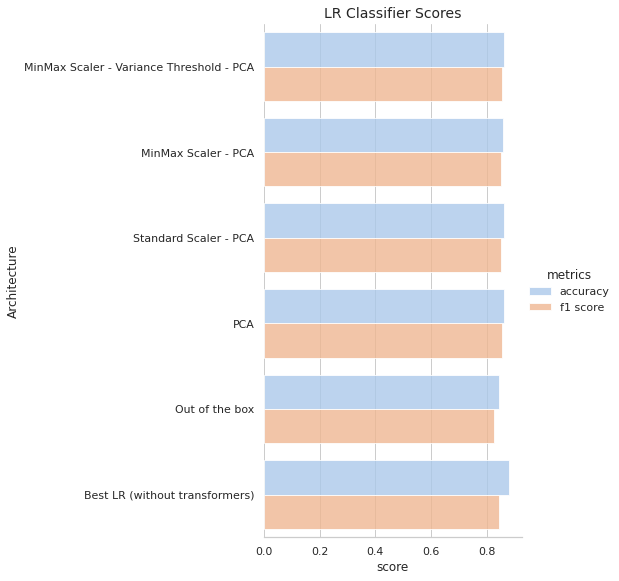

interactive(children=(Dropdown(description='architecture', options=('MinMax Scaler - Variance Threshold - PCA'…

In [ ]:
lr_df = pd.DataFrame([[x, 'accuracy', japanese_credit_screening_LR[x]['accuracy']] for x in japanese_credit_screening_LR] +
                  [[x, 'f1 score', japanese_credit_screening_LR[x]['f1']] for x in japanese_credit_screening_LR], 
                  columns = ['architecture', 'metric', 'score']) 

sns.set_theme(style = "whitegrid")
g = sns.catplot(
    data = lr_df, kind = "bar",
    x = "score", y = "architecture", hue = "metric",
    palette = "pastel", alpha = .8, height = 8
)
g.despine(left=True)
g.ax.set_title("LR Classifier Scores", fontsize = 14)
g.set_axis_labels("score", "Architecture")
g.legend.set_title("metrics")

architecture_lr = Dropdown(options = japanese_credit_screening_LR.keys())

@interact(architecture = architecture_lr)
def print_scores(architecture):
    print('accuracy:', japanese_credit_screening_LR[architecture]['accuracy'])
    print('f1 score:', japanese_credit_screening_LR[architecture]['f1'])

<b>Συμπερασματικά, λοιπόν, ο βελτιστοποιημένος Logistic Regression ταξινομητής αντιστοιχεί στην αρχιτεκτονική που δεν περιέχει επιπλέον μετασχημτιστές, δηλαδή αποτελείται μόνο από τον LR(solver = 'liblinear', penaty = 'l1', tol = 1, C = 0.2, intercept_scaling = 50, class_weight = 'balanced', max_iter = 500, verbose = 0) και επιτυγχάνει accuracy = 0.8819 και f1 score = 0.8431 κατά τη διαδικασία του 10-fold cross validation.

### Αποτελέσματα και συμπεράσματα

Συμπερασματικά, λοιπόν, καταλήξαμε στους ακόλουθους τρεις βελτιστοποιημένους ταξινομητές:

- Gaussian Naive Bayes (GNB): Η βέλτιστη αρχιτεκτονική για τον Gaussian Naive Bayes Classifier είναι ένας MinMax Scaler ακολουθούμενος από έναν μετασχηματιστή Variance Threshold με threshold = 0.03, έναν μετασχηματιστή PCA με n_components = 8 και έπειτα τον GNB ταξινομητή.
- KNeirestNeighbors (kNN): Η βέλτιστη αρχιτεκτονική για τον kNN ταξινομητή είναι ένας MinMax Scaler ακολουθούμενος από έναν μετασχηματιστή Variance Threshold με threshold = 0.03 και έπειτα τον kNN ταξινομητή με n_neighbors = 13 , weights = 'distance', metric = 'minkowski' και p = 2 (euclidean distance).
- Logistic Regression Classifier (LR): Η βέλτιστη αρχιτεκτονική για τον LR ταξινομητή είναι ένας LR ταξινομητής, χωρί επιπλέον μετασχηματιστές, με solver = 'liblinear', tol = 1, C = 0.2, intercept_scaling = 50, class_weight = 'balanced', max_iter = 500 και verbose = 0.

Ορίζουμε εκ νέου καθέναν από αυτούς τους βελιστοποιημένους ταξινομητές, τους εκπαιδεύουμε με ένα fit πάνω σε όλο το train dataset και έπειτα τους εφαρμόζουμε πάνω στο test dataset προκειμένου να συγκρίνούμε τους χρόνους που αυτοί απαιτούν κατά το στάδιο της εκπαίδευσής και της πρόβλεψης αλλά και τα ποσοστά που αυτοί επιτυγχάνουν τελικά πάνω στο test dataset.   

In [43]:
df_test = []

In [44]:
gnb = Pipeline(steps = [('minmax_scaler', preprocessing.MinMaxScaler()), ('selector', VarianceThreshold(threshold = 0.03)), ('pca', PCA(n_components = 8)), ('gnb', GaussianNB())])

In [46]:
import time
from sklearn.metrics import classification_report, accuracy_score, f1_score

start_time = time.time()
gnb.fit(X_train, y_train)
print("fit time for GNB: %s seconds" % (time.time() - start_time))
print()

start_time = time.time()
preds_gnb = gnb.predict(X_test)
print("predict time for GNB: %s seconds" % (time.time() - start_time))
print()

acc = np.round(accuracy_score(y_test, preds_gnb), 4)
df_test.append(['accuracy', 'GNB', 'optimized', acc])
print('test accuracy score for GNB:', acc)
f1 = np.round(f1_score(y_test, preds_gnb), 4)
df_test.append(['f1', 'GNB', 'optimized', f1])
print('test f1 score for GNB:', f1)
print()

print()
print(classification_report(y_test, preds_gnb))

fit time for GNB: 0.008638620376586914 seconds

predict time for GNB: 0.0007474422454833984 seconds

test accuracy score for GNB: 0.8986
test f1 score for GNB: 0.8995


              precision    recall  f1-score   support

           0       0.89      0.90      0.90       102
           1       0.90      0.90      0.90       105

    accuracy                           0.90       207
   macro avg       0.90      0.90      0.90       207
weighted avg       0.90      0.90      0.90       207



In [47]:
knn = Pipeline(steps = [('minmax_scaler', preprocessing.MinMaxScaler()), ('selector', VarianceThreshold(threshold = 0.03)), 
                        ('knn', KNeighborsClassifier(n_neighbors = 13, weights = 'distance', metric = 'minkowski', p = 2))])

In [49]:
start_time = time.time()
knn.fit(X_train, y_train)
print("fit time for kNN: %s seconds" % (time.time() - start_time))
print()

start_time = time.time()
preds_knn = knn.predict(X_test)
print("predict time for kNN: %s seconds" % (time.time() - start_time))
print()

acc = np.round(accuracy_score(y_test, preds_knn), 4)
df_test.append(['accuracy', 'kNN', 'optimized', acc])
print('test accuracy score for kNN:', acc)
f1 = np.round(f1_score(y_test, preds_knn), 4)
df_test.append(['f1', 'kNN', 'optimized', f1])
print('test f1 score for kNN:', f1)
print()

print()
print(classification_report(y_test, preds_knn))

fit time for kNN: 0.0018935203552246094 seconds

predict time for kNN: 0.004206657409667969 seconds

test accuracy score for kNN: 0.8744
test f1 score for kNN: 0.87


              precision    recall  f1-score   support

           0       0.84      0.92      0.88       102
           1       0.92      0.83      0.87       105

    accuracy                           0.87       207
   macro avg       0.88      0.88      0.87       207
weighted avg       0.88      0.87      0.87       207



In [50]:
lr = LogisticRegression(solver = 'liblinear', penalty = 'l1', tol = 1, C = 0.2, intercept_scaling = 50, class_weight = 'balanced', max_iter = 500, verbose = 0)

In [52]:
start_time = time.time()
lr.fit(X_train, y_train)
print("fit time for LR: %s seconds" % (time.time() - start_time))
print()

start_time = time.time()
preds_lr = lr.predict(X_test)
print("predict time for LR: %s seconds" % (time.time() - start_time))
print()

acc = np.round(accuracy_score(y_test, preds_lr), 4)
df_test.append(['accuracy', 'LR', 'optimized', acc])
print('test accuracy score for LR:', acc)
f1 = np.round(f1_score(y_test, preds_lr), 4)
df_test.append(['f1', 'LR', 'optimized', f1])
print('test f1 score for LR:', f1)
print()

print()
print(classification_report(y_test, preds_lr))

fit time for LR: 0.002256155014038086 seconds

predict time for LR: 0.0020177364349365234 seconds

test accuracy score for LR: 0.8889
test f1 score for LR: 0.8987


              precision    recall  f1-score   support

           0       0.96      0.80      0.88       102
           1       0.84      0.97      0.90       105

    accuracy                           0.89       207
   macro avg       0.90      0.89      0.89       207
weighted avg       0.90      0.89      0.89       207



Συνοψίζουμε τα παραπάνω αποτελέσματα στον ακόλουθο πίνακα:

Optimum Classifier | 10-fold cross-val accuracy | 10-fold cross-val f1 score | test accuracy | test f1 score | fit time | predict time 
-------------------|------------------ | ------------------| ------------------ | ------------------ | ------------------ | ------------------
GNB       | 0.8529 | 0.8293 | 0.8986 | 0.8995 | 0.0087 | 0.0075
kNN      | 0.8739 | 0.8674 | 0.8744 | 0.87 | 0.002 | 0.0042
LR       | 0.8819 | 0.8431 | 0.8889 | 0.8987 | 0.0022 | 0.002

Σύμφωνα με τον παραπάνω πίνακα ο Gaussian Naive Bayes Classifier απαιτεί τον περισσότερο χρόνο τόσο κατά το στάδιο της εκπαίδευσης όσο και κατά το στάδιο της πρόβλεψης, κάτι το οποίο βέβαια πιθανώς οφείλεται και στη λίγο πιο πολύπλοκη αρχιτεκτονική του, καθώς περιλαμβάνει και μετασχηματισμό PCA, σε αντίθεση με τις άλλες δύο αρχικτεκτονικές. Παράλληλα, παρατηρούμε ότι ο μικρότερος χρόνος κατά το στάδιο της εκπαίδευσης αντιστοιχεί στον kNN ταξινομητή, κάτι το οποίο είναι αναμενόμενο καθώς πρακτικά ο ταξινομητής αυτός κατά τη διαδικασία της εκπαίδευσης δεν εκτελεί κάποιον ιδιαίτερο υπολογισμό (κατά το στάδιο της πρόβλεψης υπολογίζει τις αποστάσεις του εκάστοτε test δείγματος από όλα τα train δείγματα). Μάλιστα, ο ταξινομητής αυτός (kNN), για τον ίδιο λόγο, είναι ο μόνος που χαρακτηρίζεται από μεγαλύτερο χρόνο πρόβλεψης συγκριτικά με το χρόνο εκπαίδευσης. Οι διαφορές, βέβαια, μεταξύ των εκάστοτε χρόνων είναι αρκετά μικρές λόγω του μικρού μεγέθους dataset, και οι αποκλίσεις μεταξύ τους γίνονται περισσότερο αισθητές σε μεγαλύτερα dataset.   

Στη συνέχεια, απεικονίζουμε σε διαγράμματα τα scores των out-of-the -box καθώς και των βελτιστοποιημένων ταξινομητών, προκειμένου να αντιληφθούμε καλύτερα τις βελτιώσεις που έχουμε επιτύχει σε αυτά. 

In [88]:
df_test_acc = pd.DataFrame([['GNB', 'out of the box', japanese_credit_screening_accuracy_out_of_the_box['gaussian naive bayes']]] +
                            [['kNN', 'out of the box', japanese_credit_screening_accuracy_out_of_the_box['knn']]] + 
                            [['LR', 'out of the box', japanese_credit_screening_accuracy_out_of_the_box['logistic regression']]] +
                            [[x[1], x[2], x[3]] for x in df_test if x[0] == 'accuracy'],
                            columns = ['classifier', 'optimization', 'score'])

df_test_f1 = pd.DataFrame([['GNB', 'out of the box', japanese_credit_screening_f1_score_out_of_the_box['gaussian naive bayes']]] +
                            [['kNN', 'out of the box', japanese_credit_screening_f1_score_out_of_the_box['knn']]] + 
                            [['LR', 'out of the box', japanese_credit_screening_f1_score_out_of_the_box['logistic regression']]] +
                            [[x[1], x[2], x[3]] for x in df_test if x[0] == 'f1'] ,
                            columns = ['classifier', 'optimization', 'score'])

df_cross_val_acc = pd.DataFrame([[x1, 'out of the box', japanese_credit_screening_cross_val_accuracy_out_of_the_box[x2]] for x1, x2 in zip(['GNB', 'kNN', 'LR'], ['gaussian naive bayes', 'knn', 'logistic regression'])] +
                  [['GNB', 'optimized', japanese_credit_screening_gnb['MinMax Scaler - Variance Threshold - PCA']['accuracy']]] + 
                  [['kNN', 'optimized', japanese_credit_screening_kNN['MinMax Scaler - Variance Threshold']['accuracy']]] + 
                  [['LR', 'optimized', japanese_credit_screening_LR['Best LR (without transformers)']['accuracy']]],
                  columns = ['classifier', 'optimization', 'score']) 

df_cross_val_f1 = pd.DataFrame([[x1, 'out of the box', japanese_credit_screening_cross_val_f1_score_out_of_the_box[x2]] for x1, x2 in zip(['GNB', 'kNN', 'LR'], ['gaussian naive bayes', 'knn', 'logistic regression'])] +
                  [['GNB', 'optimized', japanese_credit_screening_gnb['MinMax Scaler - Variance Threshold - PCA']['f1']]] + 
                  [['kNN', 'optimized', japanese_credit_screening_kNN['MinMax Scaler - Variance Threshold']['f1']]] + 
                  [['LR', 'optimized', japanese_credit_screening_LR['Best LR (without transformers)']['f1']]],
                  columns = ['classifier', 'optimization', 'score']) 

Text(0.5, 1.0, 'Test F1 Score')

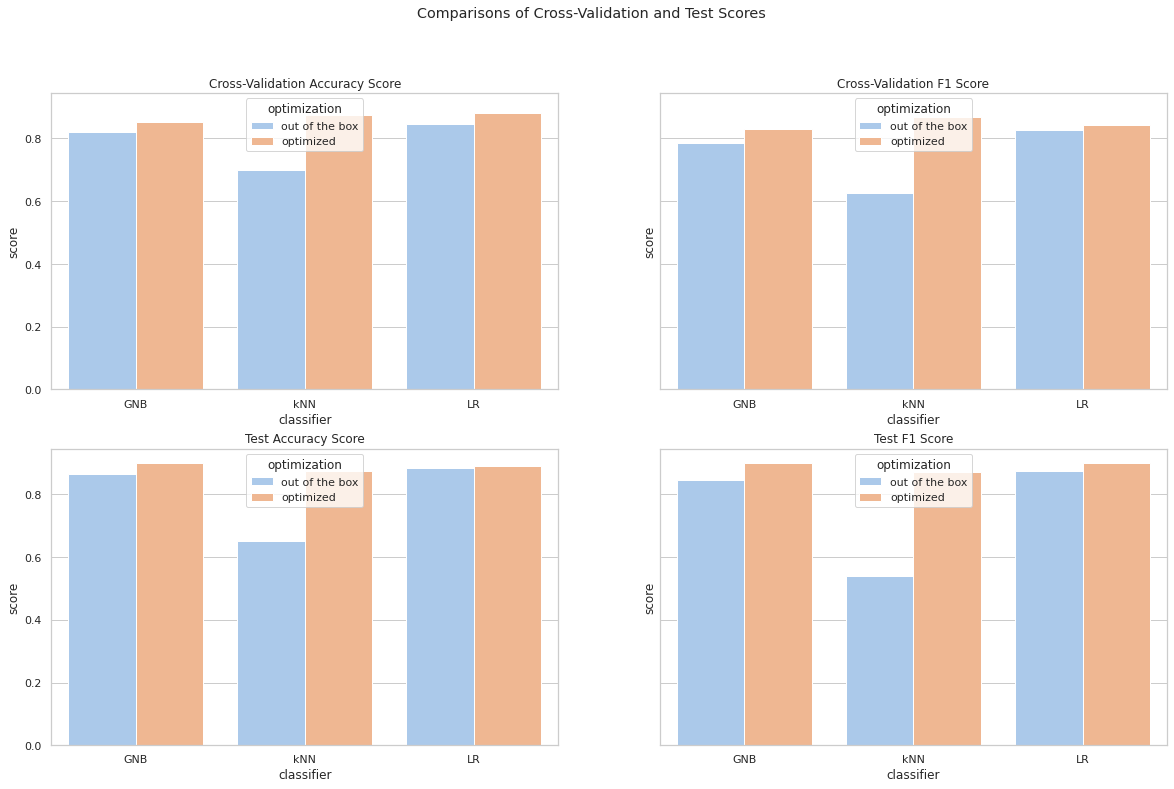

In [101]:
fig, axes = plt.subplots(2, 2, figsize = (20, 12), sharey = True)
fig.suptitle('Comparisons of Cross-Validation and Test Scores')

sns.set_theme(style = "whitegrid")
sns.barplot(ax = axes[0, 0], data = df_cross_val_acc, x = "classifier", y = "score", hue = "optimization", palette = "pastel", alpha = 1)
axes[0, 0].set_title('Cross-Validation Accuracy Score')
sns.barplot(ax = axes[0, 1], data = df_cross_val_f1, x = "classifier", y = "score", hue = "optimization", palette = "pastel", alpha = 1)
axes[0, 1].set_title('Cross-Validation F1 Score')

sns.barplot(ax = axes[1, 0], data = df_test_acc, x = "classifier", y = "score", hue = "optimization", palette = "pastel", alpha = 1)
axes[1, 0].set_title('Test Accuracy Score')
sns.barplot(ax = axes[1, 1], data = df_test_f1, x = "classifier", y = "score", hue = "optimization", palette = "pastel", alpha = 1)
axes[1, 1].set_title('Test F1 Score')

Παρατηρούμε, λοιπόν, ότι οι βελτιστοποιημένοι ταξινομητές επιτυγχάνουν καλύτερα accuracy και f1 scores, συγκριτκά με τους αντίστοιχους out-of-the-box, τόσο κατά τη διδικασία του 10-fold cross validation όσο και εφαρμοζόμενοι στο test set αφού εκπαιδευτούν στο train set. Τις μεγαλύτερες βελτιώσεις, όσον αφορά το είδος του ταξινομητή, τις παρατηρούμε στον kNN τσξινομητή φτάνοντας σχεδόν το 20%, ενώ όσον αφορά τις μετρικές στο f1 score.

Τέλος, απεικονίζουμε τους πίνακες σύγχυσης(confusion matrices) των τριών βελτιστοποιημένων ταξινομητών.

In [55]:
from sklearn.metrics import confusion_matrix

cf_matrix_gnb = confusion_matrix(y_test, preds_gnb)
cf_matrix_knn = confusion_matrix(y_test, preds_knn)
cf_matrix_lr = confusion_matrix(y_test, preds_lr)

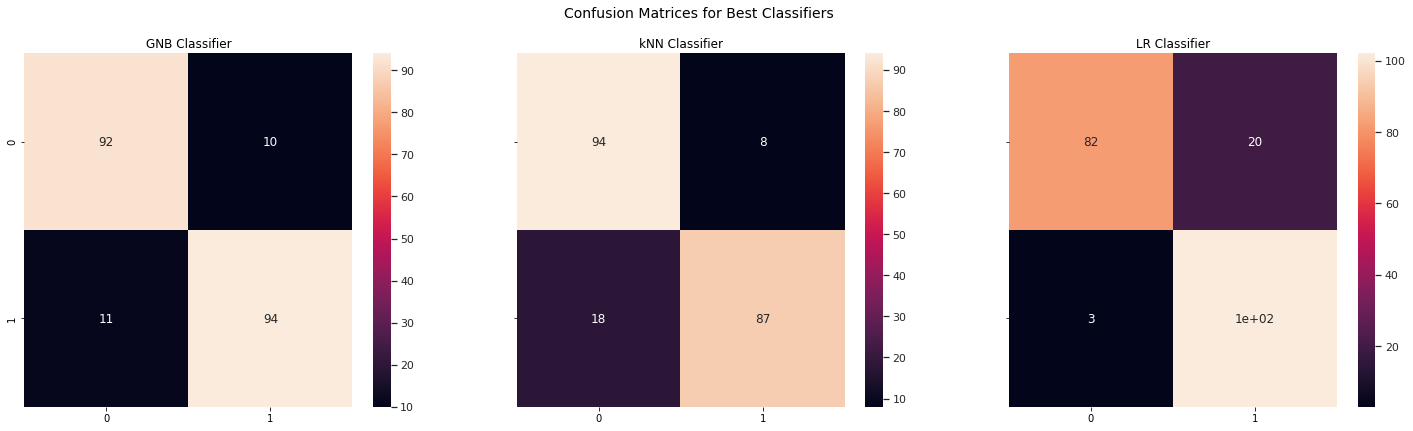

In [58]:
fig, axes = plt.subplots(1, 3, figsize = (25, 6.5), sharey = True)
fig.suptitle('Confusion Matrices for Best Classifiers', fontsize = 14)

sns.set_theme(style = "whitegrid")

axes[0].set_title('GNB Classifier')
sns.heatmap(cf_matrix_gnb, ax = axes[0], annot = True)

axes[1].set_title('kNN Classifier')
sns.heatmap(cf_matrix_knn, ax = axes[1], annot = True)

axes[2].set_title('LR Classifier')
sns.heatmap(cf_matrix_lr, ax = axes[2], annot = True)

plt.show()

Από τους παραπάνω πίνακες παρατηρούμε ότι ο βελτιστοποιημένος Gaussian Naive Bayes ταξινομητής εκτελεί σωστή πρόβλεψη για 92 και 94 δείγματα των κλάσεων 0 και 1 αντίστοιχα, ενώ οδηγείται σε λάθος πρόβλεψη για 10 και 11 δείγματα των κλάσεων 0 και 1. Ομοίως, ο βελτιστοποιημένος kNN ταξινομητής προβλέπει σωστά 94 και 87 και λανθασμένα 8 και 18 δείγματα των κλάσεων 0 και 1 αντίστοιχα. Τέλος, ο βελτιστοποιημένος Logistic Regression ταξινομητής προβλέπει σωστά 82 και 100 και λανθασμένα 20 και 3 δείγματα των κλάσεων 0 και 1 αντίστοιχα. Συμπεραίνουμε, λοιπόν, ότι ο LR ταξινομητής, εντοπίζει αρκετά καλά τα δείγματα που αντιστοιχούν στην κλάση με label 0, έχοντας μάλιστα μόλις 3 false negative (λανθασμένη πρόβλεψη για την κλάση 0), αλλά μπερδεύει λίγο τα δείγματα της κλάσης 1 φτάνοντας τα 20 false positives. Αντίθετα, ο GNB και ο kNN ταξινομητής εντοπίζουν λίγο καλύτερα τα δείγματα που αντιστοιχούν στην κλάση με label 1, με τα false positives και false negatives όμως αυτών, και ιδίως του GNB, να είναι πιο ισορροπημένα.  

<b>Συμπέρασμα:</b>

Η επιλογή του καλύτερου ταξινομητή, όπως και σε ένα πραγματικό task, πρέπει να βασίζεται στα scores που προκύπτουν από τη διαδικασία του cross validation, και τα οποία υπολογίζονται αποκλειστικά και μόνο πάνω στα δεδομένα εκπαίδευσης, τα οποία και μας είναι διαθέσιμα σε κάθε task. Με βάση, λοιπόν, αυτό, επιλέγουμε μεταξύ των τριών βέλτιστοποιημένων ταξινομητών, τον Logistic Regression ταξινομητή ο οποίος επιτυγχάνει το καλύτερο δυνατό accuracy score και ένα αρκετά ικανοποιητικό f1 score, ενώ έχει και αρκετά χαμηλούς χρόνους εκπαίδευσης και πρόβλεψης. Το μοντέλο, που τελικά επιλέξαμε, εφαρμοσμένο στο test dataset επιτυγχάνει accuracy score = 0.8889 και f1 score = 0.8987. 